In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,618 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

## 런타임 재시작

In [ ]:
%cd /content/drive/MyDrive/금융데이터 공모전

/content/drive/MyDrive/금융데이터 공모전


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install graphviz

# 데이터전처리
### BC카드 데이터와 신한은행 데이터를 <성별, 연령, 법정동> 기준으로 조인하여 Sum한 값들을 인구수로 나누어주어서 1인당 값을 의미하는 데이터로 바꾸고자 한다. 

### 신한은행 데이터는 이미 개별로 수집된 데이터 이기 때문에 해당 값/수집된 값으로 계산할 것이며 BC카드는 서울시 인구수 데이터를 이용해서 값으로 나눌 것이다. 

EX) **BC카드** **데이터 : 디지털매출건수 / 특정조건의 서울시 인구수 >>> 조인은 <성별, 연령, 법정동>을 기준으로 조인 할 것이다.**

**신한은행 데이터 : 총수신금액 / 계산된 n값**


## 1. BC카드 데이터 1인당 값으로 전처리

### (1)인구수에 대한 데이터 전처리

In [ ]:
refined_data= pd.read_csv("refined_data.csv").drop(columns='Unnamed: 0')
refined_data

,기준년월,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,...,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n
0,1,가락동,1,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,0,0,67,5798971,0,0,0,0,...,0,0,0,75,2616631.0,0,0,0,0,0,0,0,0,0,0,104,4756975,0,0.0,0,0,0,0,0,0,0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.000000e+00,0,0.0,345
1,1,가락동,1,30,21,1080521,196,3600015.0,1668,59595901,108,9026481,0,0,100,39755142,117,4135460,0,0.0,25,567484,42,1015110,0,0,0,0,0,0,21,957182,0,0,179,16190891,17,430116,0,0,...,0,25,830798,191,14826786.0,217,5987547,83,2626345,25,1594809,17,668324,29,471401,125,9718752,46,3075242.0,13,6226610,33,4203398,42,5478900,0,0,180731220,0,0.0,542263647,1733864271,1.801342e+09,27558987.0,0,412696176.0,2.196871e+09,0,0.0,411
2,1,가락동,1,40,21,697386,104,4246085.0,867,38478365,121,4147988,0,0,67,5106545,162,32823629,0,0.0,25,847366,63,506408,0,0,0,0,0,0,29,1517266,0,0,158,6323198,21,1207176,0,0,...,0,33,949035,105,9799656.0,87,2745620,96,3029070,25,4572509,21,576698,17,315802,84,12363378,63,2511968.0,0,0,0,0,29,1282589,0,0,122834583,0,0.0,499549200,1690930581,7.602494e+08,396429036.0,41064933,586295709.0,1.179034e+09,1469238294,0.0,369
3,1,가락동,1,50,17,2773427,58,2648983.0,221,10348725,29,2016253,0,0,25,5518572,38,3209088,0,0.0,0,0,442,2767466,0,0,0,0,0,0,17,968584,0,0,54,11018000,13,682882,0,0,...,0,0,0,29,3236812.0,25,359368,38,926352,0,0,0,0,0,0,92,6889960,17,1045485.0,0,0,0,0,0,0,0,0,60371844,6961017,0.0,546344004,1582574676,5.228890e+08,807396303.0,34321524,261313674.0,2.075667e+09,724597086,0.0,363
4,1,가락동,1,60,0,0,0,0.0,29,1317362,0,0,0,0,0,0,0,0,0,0.0,0,0,142,115481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,46,10488912,0,0.0,0,0,0,0,0,0,0,0,9518316,13826772,65234532.0,586165779,2645038200,9.619000e+08,791406597.0,0,299537916.0,1.366055e+09,627738162,0.0,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,5,흥인동,1,50,0,0,0,0.0,0,0,0,0,0,0,0,0,5,157459,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,7565973,21540136,1.691960e+07,0.0,0,0.0,0.000000e+00,0,0.0,4
14468,5,흥인동,0,20,0,0,19,363764.0,179,5707264,14,269817,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,266084,0,0,0,0,...,334677,0,0,12,1026043.0,0,0,0,0,0,0,0,0,0,0,0,0,7,289857.0,0,0,0,0,5,432260,0,0,0,0,0.0,8887386,14462496,1.505395e+07,0.0,0,0.0,0.000000e+00,0,0.0,4
14469,5,흥인동,0,30,0,0,10,299624.0,201,8010103,17,657255,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,1278523,0,0,0,0,...,0,0,0,0,0.0,9,821315,9,329255,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,6467308,0,0.0,15377193,63203897,4.582949e+07,0.0,0,0.0,0.000000e+00,0,0.0,6
14470,5,흥인동,0,40,0,0,27,501504.0,120,7970038,12,353441,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,10,564135,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,9113575,29198407,1.760240e+07,4008189.0,1058035,17024229.0,1.328604e+08,0,0.0,4


In [ ]:
#3개 데이터 모두 서울 뿐만 아니라 전국에 대한 수집 값
df1=pd.read_excel("법정동to행정동치환 자료.xlsx")
df2=pd.read_csv("인구수비중남자.csv", encoding="cp949")
df3=pd.read_csv('인구수비중여자.csv', encoding="cp949")

In [ ]:
df1=df1[['행정동코드', '법정동코드', '법정동']]

In [ ]:
df1

,행정동코드,법정동코드,법정동
0,11000000,11000000.0,서울특별시
1,11110000,11110000.0,종로구
2,11110515,11110101.0,청운동
3,11110515,11110102.0,신교동
4,11110515,11110103.0,궁정동
...,...,...,...
21734,50130610,50130114.0,대포동
21735,50130610,50130118.0,하원동
21736,50130620,50130119.0,색달동
21737,50130620,50130120.0,상예동


In [ ]:
df2.head()

,행정동코드,성별,연령,인구수
0,11000000,1,20,707669
1,11000000,1,30,737901
2,11000000,1,40,756950
3,11000000,1,50,748582
4,11000000,1,60,1016049


In [ ]:
df3

,행정동코드,성별,연령,인구수
0,11000000,0,20,752742
1,11000000,0,30,737205
2,11000000,0,40,771232
3,11000000,0,50,774974
4,11000000,0,60,1210075
...,...,...,...,...
19230,50130620,0,20,239
19231,50130620,0,30,194
19232,50130620,0,40,246
19233,50130620,0,50,306


In [ ]:
join_popboy= pd.merge(left=df2, right=df1, how='left', on='행정동코드',left_index=True)
join_popboy ####예를 들어, 행정동 11110515 같은 경우는 >>다양한 법정동으로 치환이 가능해서 중복값으로 나오게 됨, 
                       #####하지만 우리는 결국 법정동으로 조인 할 꺼니깐 괜찮음>> left조인할때 필요한 것 만 갖가서 조인 하겠지

,행정동코드,성별,연령,인구수,법정동코드,법정동
0.0,11000000,1,20,707669,11000000.0,서울특별시
0.0,11000000,1,30,737901,11000000.0,서울특별시
0.0,11000000,1,40,756950,11000000.0,서울특별시
0.0,11000000,1,50,748582,11000000.0,서울특별시
0.0,11000000,1,60,1016049,11000000.0,서울특별시
...,...,...,...,...,...,...
21737.0,50130620,1,50,383,50130120.0,상예동
21738.0,50130620,1,50,383,50130121.0,하예동
21736.0,50130620,1,60,575,50130119.0,색달동
21737.0,50130620,1,60,575,50130120.0,상예동


행정동이랑 법정동조인할 떄 인구수가 중복되는 것을 제거 해보겠다.(남자데이터로 먼저하고 여자꺼는 중간 과정은 생략)

In [ ]:
### 중복된 값들이 발생함. 왜냐하면 행정동이 더 세분화되 개념인데 그게 반드시 법정코드에 부분집합화 되어 있는 개념은 아니기 때문에 중복값이 발생한다.
### 그래서 이렇게 미스매치 된 값들을 일단 다 제거해보고 진행해 보겠다. 만약, 이럴경우 행정동의 평균으로 간주 할 수 있으면 그렇게 해도 괜찮을 것이다.
join_popboy[join_popboy.duplicated(['행정동코드',	'성별',	'연령',	'인구수'])]

,행정동코드,성별,연령,인구수,법정동코드,법정동
3.0,11110515,1,20,793,11110102.0,신교동
4.0,11110515,1,20,793,11110103.0,궁정동
5.0,11110515,1,20,793,11110104.0,효자동
6.0,11110515,1,20,793,11110105.0,창성동
7.0,11110515,1,20,793,11110108.0,통인동
...,...,...,...,...,...,...
21738.0,50130620,1,40,299,50130121.0,하예동
21737.0,50130620,1,50,383,50130120.0,상예동
21738.0,50130620,1,50,383,50130121.0,하예동
21737.0,50130620,1,60,575,50130120.0,상예동


In [ ]:
###법정동이랑 행정동을 조인할 떄 중복된 값들을 다 제거해준 값들!
join_popboy_clear=join_popboy.drop_duplicates(subset=['행정동코드',	'성별',	'연령',	'인구수'])
join_popboy_clear

,행정동코드,성별,연령,인구수,법정동코드,법정동
0.0,11000000,1,20,707669,11000000.0,서울특별시
0.0,11000000,1,30,737901,11000000.0,서울특별시
0.0,11000000,1,40,756950,11000000.0,서울특별시
0.0,11000000,1,50,748582,11000000.0,서울특별시
0.0,11000000,1,60,1016049,11000000.0,서울특별시
...,...,...,...,...,...,...
21736.0,50130620,1,20,252,50130119.0,색달동
21736.0,50130620,1,30,249,50130119.0,색달동
21736.0,50130620,1,40,299,50130119.0,색달동
21736.0,50130620,1,50,383,50130119.0,색달동


In [ ]:
###중복값 제거가 잘되었는지 확인>>> 잘되었음
join_popboy_clear[join_popboy_clear.duplicated(['행정동코드',	'성별',	'연령',	'인구수'])]

,행정동코드,성별,연령,인구수,법정동코드,법정동


In [ ]:
##남자 인구 통계 데이터 프레임
join_popboy_clear=join_popboy_clear[['법정동코드','법정동','성별','연령','인구수']]
join_popboy_clear

,법정동코드,법정동,성별,연령,인구수
0.0,11000000.0,서울특별시,1,20,707669
0.0,11000000.0,서울특별시,1,30,737901
0.0,11000000.0,서울특별시,1,40,756950
0.0,11000000.0,서울특별시,1,50,748582
0.0,11000000.0,서울특별시,1,60,1016049
...,...,...,...,...,...
21736.0,50130119.0,색달동,1,20,252
21736.0,50130119.0,색달동,1,30,249
21736.0,50130119.0,색달동,1,40,299
21736.0,50130119.0,색달동,1,50,383


In [ ]:
##여자 인구 통계 데이터 프레임
join_popgirl= pd.merge(left=df3, right=df1, how='left', on='행정동코드',left_index=True)
join_popgirl_clear=join_popgirl.drop_duplicates(subset=['행정동코드',	'성별',	'연령',	'인구수'])
join_popgirl_clear=join_popgirl_clear[['법정동코드','법정동','성별','연령','인구수']]
join_popgirl_clear

,법정동코드,법정동,성별,연령,인구수
0.0,11000000.0,서울특별시,0,20,752742
0.0,11000000.0,서울특별시,0,30,737205
0.0,11000000.0,서울특별시,0,40,771232
0.0,11000000.0,서울특별시,0,50,774974
0.0,11000000.0,서울특별시,0,60,1210075
...,...,...,...,...,...
21736.0,50130119.0,색달동,0,20,239
21736.0,50130119.0,색달동,0,30,194
21736.0,50130119.0,색달동,0,40,246
21736.0,50130119.0,색달동,0,50,306


In [ ]:
##남자,여자 인구수 데이터 하나로 합치기(merge_popul.csv로 송출)
merge_popul=pd.concat([join_popboy_clear,join_popgirl_clear])
merge_popul

# merge_popul.to_csv('merge_popul.csv')

,법정동코드,법정동,성별,연령,인구수
0.0,11000000.0,서울특별시,1,20,707669
0.0,11000000.0,서울특별시,1,30,737901
0.0,11000000.0,서울특별시,1,40,756950
0.0,11000000.0,서울특별시,1,50,748582
0.0,11000000.0,서울특별시,1,60,1016049
...,...,...,...,...,...
21736.0,50130119.0,색달동,0,20,239
21736.0,50130119.0,색달동,0,30,194
21736.0,50130119.0,색달동,0,40,246
21736.0,50130119.0,색달동,0,50,306


### (2)BC카드 1인당 값으로 나누기

'refined_data(수용이가 만든 nfinsumjoin2.csv데이터에서 기준년월을 1,2,3,4로 바꾸고 송출한 것)에는 법정동이 없기 떄문에 내가 그전에 작업한 법정동코드를 이 데이터에 붙여줄 것임. df는 df1에서 읍면동을 제거해준것이기 때문에 어차피 같은 데이터이기여서 그냥 옆으로 병렬로 붙여줘도 상관이 없어서 옆에 열이름을 추가해서 그대로 붙여 주었음 >> 그래서 읍면동이랑 법정동코드를 같이 추출하려고 하는 것임

In [ ]:
df=pd.read_excel('머신러닝을 위한 학습자료(월을 기준으로 합쳐서 숫자화).xlsx')
df1=pd.read_csv('BC card.csv')
df

,기준년월,품목대분류코드,품목중분류코드,성별,연령,가구생애주기,시군구,법정동코드,매출금액,매출건수,예금금액,소비금액,주택대출금액,전세자금대출,인구밀도
0,201903,10,1010,0,40.0,3,구로구,11530109.0,782521,13,NaN,NaN,NaN,NaN,NaN
1,201903,21,2110,0,20.0,2,구로구,11530109.0,963789,29,NaN,NaN,NaN,NaN,NaN
2,201903,19,1913,0,30.0,2,구로구,11530109.0,924309,46,NaN,NaN,NaN,NaN,NaN
3,201903,21,2111,0,30.0,2,구로구,11530109.0,1089360,54,NaN,NaN,NaN,NaN,NaN
4,201903,17,1710,0,30.0,2,구로구,11530109.0,1656740,58,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306117,202103,20,2013,0,30.0,1,영등포구,11560108.0,1411368,7,NaN,NaN,NaN,NaN,NaN
306118,202103,21,2110,1,30.0,1,영등포구,11560108.0,1386040,63,NaN,NaN,NaN,NaN,NaN
306119,202103,11,1113,0,30.0,2,영등포구,11560108.0,390818,7,NaN,NaN,NaN,NaN,NaN
306120,202103,16,1610,1,40.0,3,영등포구,11560108.0,327592,7,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1['법정동코드']=df['법정동코드']
df2=df1[['읍면동','법정동코드']]

In [ ]:
df2[df2.duplicated(['읍면동','법정동코드'])]

,읍면동,법정동코드
1,궁동,11530109.0
2,궁동,11530109.0
3,궁동,11530109.0
4,궁동,11530109.0
6,길동,11740105.0
...,...,...
306117,영등포동7가,11560108.0
306118,영등포동7가,11560108.0
306119,영등포동7가,11560108.0
306120,영등포동7가,11560108.0


In [ ]:
df2=df2.drop_duplicates(subset=['읍면동', '법정동코드'], keep='first')

In [ ]:
df2[df2['법정동코드'].isnull()]  ## 궁정동: 11110103 도럼동:11110116 봉래동2가:11140120

,읍면동,법정동코드
75512,궁정동,NaN
135887,도렴동,NaN
260662,봉래동2가,NaN


In [ ]:
df2.loc[75512,'법정동코드']=11110103
df2.loc[135887,'법정동코드']=11110116
df2.loc[260662,'법정동코드']=111140120

In [ ]:
df2.isnull().sum()

읍면동      0
법정동코드    0
dtype: int64

여기 위에서 까지가 수용이가 만든 데이터프레임에 법정동코드를 붙여주기 위한 이전 작업을 하였고 지금부터는 df2 데이터가 가지고 있는 법정동코드를 refined_data에 조인을 시켜주면서 refined_data가 법정동코드를 가지게 만들 것임. 여기서 법정동이랑 읍면동은 결국 같은 것임

In [ ]:
refined_data_final=pd.merge(left=refined_data, right=df2, how='left', left_on='법정동', right_on='읍면동')
refined_data_final=refined_data_final.drop(columns='읍면동')
refined_data_final['법정동코드'].isnull().sum() ####결측치가 없음을 확인

0

In [ ]:
col1=refined_data_final.columns[1:].to_list()
col2=refined_data_final.columns[:1].to_list()
new_col = col1+col2
refined_data_final = refined_data_final[new_col]

In [ ]:
refined_data_final

,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n,법정동코드,기준년월
0,가락동,1,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,0,0,67,5798971,0,0,0,0,13,...,0,75,2616631.0,0,0,0,0,0,0,0,0,0,0,104,4756975,0,0.0,0,0,0,0,0,0,0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.000000e+00,0,0.0,345,11710107.0,1
1,가락동,1,30,21,1080521,196,3600015.0,1668,59595901,108,9026481,0,0,100,39755142,117,4135460,0,0.0,25,567484,42,1015110,0,0,0,0,0,0,21,957182,0,0,179,16190891,17,430116,0,0,38,...,830798,191,14826786.0,217,5987547,83,2626345,25,1594809,17,668324,29,471401,125,9718752,46,3075242.0,13,6226610,33,4203398,42,5478900,0,0,180731220,0,0.0,542263647,1733864271,1.801342e+09,27558987.0,0,412696176.0,2.196871e+09,0,0.0,411,11710107.0,1
2,가락동,1,40,21,697386,104,4246085.0,867,38478365,121,4147988,0,0,67,5106545,162,32823629,0,0.0,25,847366,63,506408,0,0,0,0,0,0,29,1517266,0,0,158,6323198,21,1207176,0,0,38,...,949035,105,9799656.0,87,2745620,96,3029070,25,4572509,21,576698,17,315802,84,12363378,63,2511968.0,0,0,0,0,29,1282589,0,0,122834583,0,0.0,499549200,1690930581,7.602494e+08,396429036.0,41064933,586295709.0,1.179034e+09,1469238294,0.0,369,11710107.0,1
3,가락동,1,50,17,2773427,58,2648983.0,221,10348725,29,2016253,0,0,25,5518572,38,3209088,0,0.0,0,0,442,2767466,0,0,0,0,0,0,17,968584,0,0,54,11018000,13,682882,0,0,0,...,0,29,3236812.0,25,359368,38,926352,0,0,0,0,0,0,92,6889960,17,1045485.0,0,0,0,0,0,0,0,0,60371844,6961017,0.0,546344004,1582574676,5.228890e+08,807396303.0,34321524,261313674.0,2.075667e+09,724597086,0.0,363,11710107.0,1
4,가락동,1,60,0,0,0,0.0,29,1317362,0,0,0,0,0,0,0,0,0,0.0,0,0,142,115481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0,0,0,0,46,10488912,0,0.0,0,0,0,0,0,0,0,0,9518316,13826772,65234532.0,586165779,2645038200,9.619000e+08,791406597.0,0,299537916.0,1.366055e+09,627738162,0.0,582,11710107.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,흥인동,1,50,0,0,0,0.0,0,0,0,0,0,0,0,0,5,157459,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,7565973,21540136,1.691960e+07,0.0,0,0.0,0.000000e+00,0,0.0,4,11140163.0,5
14468,흥인동,0,20,0,0,19,363764.0,179,5707264,14,269817,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,266084,0,0,0,0,0,...,0,12,1026043.0,0,0,0,0,0,0,0,0,0,0,0,0,7,289857.0,0,0,0,0,5,432260,0,0,0,0,0.0,8887386,14462496,1.505395e+07,0.0,0,0.0,0.000000e+00,0,0.0,4,11140163.0,5
14469,흥인동,0,30,0,0,10,299624.0,201,8010103,17,657255,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,1278523,0,0,0,0,0,...,0,0,0.0,9,821315,9,329255,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,6467308,0,0.0,15377193,63203897,4.582949e+07,0.0,0,0.0,0.000000e+00,0,0.0,6,11140163.0,5
14470,흥인동,0,40,0,0,27,501504.0,120,7970038,12,353441,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0,0,0,0,10,564135,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,9113575,29198407,1.760240e+07,4008189.0,1058035,17024229.0,1.328604e+08,0,0.0,4,11140163.0,5


위에서 수용이가 만든 refined_data에서 법정동코드를 부여 했으니깐 이제부터는 원래 하려고 했던 법정동코드 기준으로 인구수를 이 데이터에 조인을 시킬 것임

In [ ]:
##merge_popul에서 법정동을 drop해보자
merge_popul=merge_popul.drop(columns='법정동')

In [ ]:
###중복값 제거를 위한 sum 작업
merge_popul2=merge_popul['인구수'].groupby([merge_popul['법정동코드'], merge_popul['성별'],merge_popul['연령']]).sum()
merge_popul2=pd.DataFrame(merge_popul2)
merge_popul2.to_csv("merge_popul2.csv")
merge_popul2=pd.read_csv("merge_popul2.csv")
merge_popul2

,법정동코드,성별,연령,인구수
0,11000000.0,0,20,752742
1,11000000.0,0,30,737205
2,11000000.0,0,40,771232
3,11000000.0,0,50,774974
4,11000000.0,0,60,1210075
...,...,...,...,...
30455,50130320.0,1,20,696
30456,50130320.0,1,30,543
30457,50130320.0,1,40,1114
30458,50130320.0,1,50,1275


In [ ]:
merge_popul=merge_popul2

정제된 데이터로 조인 실시 >>>아까 행정동 법정동 코드를 조인하면 14472개의 행이 9017로 줄어듦

5000개 정도 데이터 손실 발생>> 만약 평균으로 처리하면 어떨까??

In [ ]:
###left로 조인해서 몇개의 데이터의 손실이 있지만 괜찮다고 생각
refined_Join=pd.merge(left=refined_data_final, right=merge_popul, how='inner', on=['법정동코드','성별','연령'])
refined_Join

,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n,법정동코드,기준년월,인구수
0,가락동,1,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,0,0,67,5798971,0,0,0,0,13,...,75,2616631.0,0,0,0,0,0,0,0,0,0,0,104,4756975,0,0.0,0,0,0,0,0,0,0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.0,0,0.0,345,11710107.0,1,6114
1,가락동,1,20,0,0,148,3465320.0,735,24542751,14,253987,7,321960,9,394550,17,709821,0,0.0,0,0,16,167389,0,0,0,0,5,343532,22,1418810,0,0,69,7906034,0,0,0,0,5,...,133,7042276.0,7,220268,10,202642,0,0,5,169784,0,0,181,7835122,7,461092.0,0,0,0,0,12,586263,0,0,0,0,0.0,295865250,670979184,1.053546e+09,0.0,0,0.0,0.0,0,0.0,348,11710107.0,2,6114
2,가락동,1,20,4,117000,166,5821534.0,826,23837931,22,426765,4,192886,8,1548210,19,653814,0,0.0,0,0,16,250860,13,15000,0,0,0,0,26,1621602,0,0,71,9230347,0,0,0,0,25,...,65,2338346.0,7,178429,18,294783,0,0,9,363280,5,292214,161,6654031,13,508770.0,0,0,0,0,15,410897,0,0,7802475,0,0.0,250249365,787022433,1.008720e+09,0.0,0,0.0,0.0,0,0.0,363,11710107.0,3,6114
3,가락동,1,20,0,0,188,2131163.0,621,19129142,10,186705,0,0,0,0,0,0,0,0.0,0,0,55,200309,0,0,0,0,0,0,0,0,0,0,62,2493538,0,0,0,0,0,...,89,3425997.0,10,706423,0,0,0,0,10,132909,0,0,201,4529768,0,0.0,0,0,0,0,10,556660,0,0,5945817,0,0.0,322408389,895865343,1.203931e+09,0.0,10012653,0.0,0.0,0,0.0,375,11710107.0,4,6114
4,가락동,1,20,0,0,277,5339361.0,918,22038358,17,467866,10,7254934,9,358298,9,194203,0,0.0,0,0,42,275546,16,29266,0,0,0,0,12,482994,1,1,54,5433812,0,0,0,0,260,...,80,2756718.0,10,308020,14,301540,0,0,0,0,0,0,265,6571712,0,0.0,0,0,0,0,7,138069,0,0,13785915,0,0.0,309987843,958083105,1.061245e+09,0.0,0,0.0,0.0,0,0.0,369,11710107.0,5,6114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,양평동1가,0,60,0,0,0,0.0,7,157726,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,12326055,53415823,5.116666e+06,0.0,0,0.0,0.0,0,0.0,18,11560125.0,5,1774
9013,양평동3가,1,60,0,0,0,0.0,9,690180,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1789676.0,43818870,289102738,4.958619e+07,0.0,0,0.0,0.0,0,0.0,58,11560127.0,5,1769
9014,영등포동,1,60,0,0,0,0.0,16,2955709,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,7,437660,7,205084,0,0,0,0,0,0,7,130302,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,51612232,307362538,0.000000e+00,0.0,0,0.0,0.0,0,0.0,82,11560101.0,5,5629
9015,청운동,0,60,0,0,0,0.0,12,667273,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1134544.0,14899511,114768586,1.250022e+08,67823111.0,13376461,0.0,0.0,0,0.0,10,11110101.0,5,1683


In [ ]:
##인구수도 결측치가 없음
refined_Join['인구수'].isnull().sum()

0

여기까지가 이제 전체 값에 대한 데이터 정제를 끝난 것! 
하지만 시각화를 원한다면 refined_data.csv를 가지고 그냥 실행하는 것이 나을 것 같음

In [ ]:
# refined_Join=refined_Join.to_csv("refined_Join.csv")

In [ ]:
# refined_data

BC카드 데이터만 먼저 1인당 데이터화 시켜줌

In [ ]:
list_col=refined_Join.columns[3:102].to_list()

In [ ]:
for i in list_col:
  refined_Join[i]=refined_Join[i]/refined_Join['인구수']
refined_Join

,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n,법정동코드,기준년월,인구수
0,가락동,1,20,0.000000,0.000000,0.017010,114.828263,0.068858,2368.782303,0.004089,52.129539,0.000000,0.000000,0.000000,0.000000,0.006869,140.997219,0.0,0.0,0.0,0.0,0.002781,43.640170,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.004089,220.393850,0.000000,0.000000,0.010958,948.474158,0.0,0.0,0.0,0.0,0.002126,...,0.012267,427.973667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017010,778.046287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.0,0,0.0,345,11710107.0,1,6114
1,가락동,1,20,0.000000,0.000000,0.024207,566.784429,0.120216,4014.188911,0.002290,41.541871,0.001145,52.659470,0.001472,64.532221,0.002781,116.097645,0.0,0.0,0.0,0.0,0.002617,27.377985,0.000000,0.000000,0.0,0.0,0.000818,56.187766,0.003598,232.059208,0.000000,0.000000,0.011286,1293.103369,0.0,0.0,0.0,0.0,0.000818,...,0.021753,1151.827936,0.001145,36.026824,0.001636,33.143932,0.0,0.0,0.000818,27.769709,0.000000,0.000000,0.029604,1281.505070,0.001145,75.415767,0.0,0.0,0.0,0.0,0.001963,95.888616,0.0,0,0,0,0.0,295865250,670979184,1.053546e+09,0.0,0,0.0,0.0,0,0.0,348,11710107.0,2,6114
2,가락동,1,20,0.000654,19.136408,0.027151,952.164540,0.135100,3898.909225,0.003598,69.801276,0.000654,31.548250,0.001308,253.223749,0.003108,106.937193,0.0,0.0,0.0,0.0,0.002617,41.030422,0.002126,2.453386,0.0,0.0,0.000000,0.000000,0.004253,265.227674,0.000000,0.000000,0.011613,1509.706739,0.0,0.0,0.0,0.0,0.004089,...,0.010631,382.457638,0.001145,29.183677,0.002944,48.214426,0.0,0.0,0.001472,59.417730,0.000818,47.794243,0.026333,1088.326955,0.002126,83.213935,0.0,0.0,0.0,0.0,0.002453,67.205921,0.0,0,7802475,0,0.0,250249365,787022433,1.008720e+09,0.0,0,0.0,0.0,0,0.0,363,11710107.0,3,6114
3,가락동,1,20,0.000000,0.000000,0.030749,348.570985,0.101570,3128.744194,0.001636,30.537291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008996,32.762349,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010141,407.840693,0.0,0.0,0.0,0.0,0.000000,...,0.014557,560.352797,0.001636,115.541871,0.000000,0.000000,0.0,0.0,0.001636,21.738469,0.000000,0.000000,0.032875,740.884527,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001636,91.046778,0.0,0,5945817,0,0.0,322408389,895865343,1.203931e+09,0.0,10012653,0.0,0.0,0,0.0,375,11710107.0,4,6114
4,가락동,1,20,0.000000,0.000000,0.045306,873.300785,0.150147,3604.572784,0.002781,76.523716,0.001636,1186.610075,0.001472,58.602879,0.001472,31.763657,0.0,0.0,0.0,0.0,0.006869,45.068041,0.002617,4.786719,0.0,0.0,0.000000,0.000000,0.001963,78.998037,0.000164,0.000164,0.008832,888.749100,0.0,0.0,0.0,0.0,0.042525,...,0.013085,450.886163,0.001636,50.379457,0.002290,49.319594,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.043343,1074.862938,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001145,22.582434,0.0,0,13785915,0,0.0,309987843,958083105,1.061245e+09,0.0,0,0.0,0.0,0,0.0,369,11710107.0,5,6114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,양평동1가,0,6

지금부터는 신한은행데이터를 1인당 데이터화 시켜줌

In [ ]:
list_col2=refined_Join.columns[103:114].to_list()
list_col2

['급여입금',
 '가맹점매출입금',
 '연금입금',
 '총소비금액',
 '총수신금액',
 '예적금금액',
 '신탁금액',
 '수익증권금액',
 '신용대출금액',
 '담보대출금액',
 '주택대출금액']

In [ ]:
for i in list_col2:
  refined_Join[i]=refined_Join[i]/refined_Join['n']
refined_Join

,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n,법정동코드,기준년월,인구수
0,가락동,1,20,0.000000,0.000000,0.017010,114.828263,0.068858,2368.782303,0.004089,52.129539,0.000000,0.000000,0.000000,0.000000,0.006869,140.997219,0.0,0.0,0.0,0.0,0.002781,43.640170,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.004089,220.393850,0.000000,0.000000,0.010958,948.474158,0.0,0.0,0.0,0.0,0.002126,...,0.012267,427.973667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017010,778.046287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,17546.130435,0.0,0.000000,8.008194e+05,1.848215e+06,2.789248e+06,0.0,0.000,0.0,0.0,0.0,0.0,345,11710107.0,1,6114
1,가락동,1,20,0.000000,0.000000,0.024207,566.784429,0.120216,4014.188911,0.002290,41.541871,0.001145,52.659470,0.001472,64.532221,0.002781,116.097645,0.0,0.0,0.0,0.0,0.002617,27.377985,0.000000,0.000000,0.0,0.0,0.000818,56.187766,0.003598,232.059208,0.000000,0.000000,0.011286,1293.103369,0.0,0.0,0.0,0.0,0.000818,...,0.021753,1151.827936,0.001145,36.026824,0.001636,33.143932,0.0,0.0,0.000818,27.769709,0.000000,0.000000,0.029604,1281.505070,0.001145,75.415767,0.0,0.0,0.0,0.0,0.001963,95.888616,0.0,0,0.000000,0.0,0.000000,8.501875e+05,1.928101e+06,3.027432e+06,0.0,0.000,0.0,0.0,0.0,0.0,348,11710107.0,2,6114
2,가락동,1,20,0.000654,19.136408,0.027151,952.164540,0.135100,3898.909225,0.003598,69.801276,0.000654,31.548250,0.001308,253.223749,0.003108,106.937193,0.0,0.0,0.0,0.0,0.002617,41.030422,0.002126,2.453386,0.0,0.0,0.000000,0.000000,0.004253,265.227674,0.000000,0.000000,0.011613,1509.706739,0.0,0.0,0.0,0.0,0.004089,...,0.010631,382.457638,0.001145,29.183677,0.002944,48.214426,0.0,0.0,0.001472,59.417730,0.000818,47.794243,0.026333,1088.326955,0.002126,83.213935,0.0,0.0,0.0,0.0,0.002453,67.205921,0.0,0,21494.421488,0.0,0.000000,6.893922e+05,2.168106e+06,2.778842e+06,0.0,0.000,0.0,0.0,0.0,0.0,363,11710107.0,3,6114
3,가락동,1,20,0.000000,0.000000,0.030749,348.570985,0.101570,3128.744194,0.001636,30.537291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008996,32.762349,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010141,407.840693,0.0,0.0,0.0,0.0,0.000000,...,0.014557,560.352797,0.001636,115.541871,0.000000,0.000000,0.0,0.0,0.001636,21.738469,0.000000,0.000000,0.032875,740.884527,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001636,91.046778,0.0,0,15855.512000,0.0,0.000000,8.597557e+05,2.388974e+06,3.210482e+06,0.0,26700.408,0.0,0.0,0.0,0.0,375,11710107.0,4,6114
4,가락동,1,20,0.000000,0.000000,0.045306,873.300785,0.150147,3604.572784,0.002781,76.523716,0.001636,1186.610075,0.001472,58.602879,0.001472,31.763657,0.0,0.0,0.0,0.0,0.006869,45.068041,0.002617,4.786719,0.0,0.0,0.000000,0.000000,0.001963,78.998037,0.000164,0.000164,0.008832,888.749100,0.0,0.0,0.0,0.0,0.042525,...,0.013085,450.886163,0.001636,50.379457,0.002290,49.319594,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.043343,1074.862938,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001145,22.582434,0.0,0,37360.203252,0.0,0.000000,8.400755e+05,2.596431e+06,2.876002e+06,0.0,0.000,0.0,0.0,0.0,0.0,369,11710107.0,5,6114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
##인구수값에 null이 나오지 않기 때문에 clear하다는 것을 알 수 있음.
refined_Join[refined_Join['인구수'].isna()].shape

(0, 119)

In [ ]:
###우리가 했던것 1인화된 값으로 바뀐 정제된 데이터 송출
refined_Join.to_csv("refined_Join_per person.csv")

# 2.Data Scaling

In [ ]:
df= pd.read_csv("refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])
df.head(5)

,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,기준년월
0,가락동,1,20,0.000000,0.000000,0.017010,114.828263,0.068858,2368.782303,0.004089,52.129539,0.000000,0.000000,0.000000,0.000000,0.006869,140.997219,0.0,0.0,0.0,0.0,0.002781,43.640170,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.004089,220.393850,0.000000,0.000000,0.010958,948.474158,0.0,0.0,0.0,0.0,0.002126,...,0.0,0.000000,0.000000,0.012267,427.973667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017010,778.046287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,17546.130435,0.0,0.0,800819.426087,1.848215e+06,2.789248e+06,0.0,0.000,0.0,0.0,0.0,0.0,1
1,가락동,1,20,0.000000,0.000000,0.024207,566.784429,0.120216,4014.188911,0.002290,41.541871,0.001145,52.659470,0.001472,64.532221,0.002781,116.097645,0.0,0.0,0.0,0.0,0.002617,27.377985,0.000000,0.000000,0.0,0.0,0.000818,56.187766,0.003598,232.059208,0.000000,0.000000,0.011286,1293.103369,0.0,0.0,0.0,0.0,0.000818,...,0.0,0.001636,107.793261,0.021753,1151.827936,0.001145,36.026824,0.001636,33.143932,0.0,0.0,0.000818,27.769709,0.000000,0.000000,0.029604,1281.505070,0.001145,75.415767,0.0,0.0,0.0,0.0,0.001963,95.888616,0.0,0,0.000000,0.0,0.0,850187.500000,1.928101e+06,3.027432e+06,0.0,0.000,0.0,0.0,0.0,0.0,2
2,가락동,1,20,0.000654,19.136408,0.027151,952.164540,0.135100,3898.909225,0.003598,69.801276,0.000654,31.548250,0.001308,253.223749,0.003108,106.937193,0.0,0.0,0.0,0.0,0.002617,41.030422,0.002126,2.453386,0.0,0.0,0.000000,0.000000,0.004253,265.227674,0.000000,0.000000,0.011613,1509.706739,0.0,0.0,0.0,0.0,0.004089,...,0.0,0.001472,82.424763,0.010631,382.457638,0.001145,29.183677,0.002944,48.214426,0.0,0.0,0.001472,59.417730,0.000818,47.794243,0.026333,1088.326955,0.002126,83.213935,0.0,0.0,0.0,0.0,0.002453,67.205921,0.0,0,21494.421488,0.0,0.0,689392.190083,2.168106e+06,2.778842e+06,0.0,0.000,0.0,0.0,0.0,0.0,3
3,가락동,1,20,0.000000,0.000000,0.030749,348.570985,0.101570,3128.744194,0.001636,30.537291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008996,32.762349,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010141,407.840693,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.001636,69.506542,0.014557,560.352797,0.001636,115.541871,0.000000,0.000000,0.0,0.0,0.001636,21.738469,0.000000,0.000000,0.032875,740.884527,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001636,91.046778,0.0,0,15855.512000,0.0,0.0,859755.704000,2.388974e+06,3.210482e+06,0.0,26700.408,0.0,0.0,0.0,0.0,4
4,가락동,1,20,0.000000,0.000000,0.045306,873.300785,0.150147,3604.572784,0.002781,76.523716,0.001636,1186.610075,0.001472,58.602879,0.001472,31.763657,0.0,0.0,0.0,0.0,0.006869,45.068041,0.002617,4.786719,0.0,0.0,0.000000,0.000000,0.001963,78.998037,0.000164,0.000164,0.008832,888.749100,0.0,0.0,0.0,0.0,0.042525,...,0.0,0.000818,36.832188,0.013085,450.886163,0.001636,50.379457,0.002290,49.319594,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.043343,1074.862938,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001145,22.582434,0.0,0,37360.203252,0.0,0.0,840075.455285,2.596431e+06,2.876002e+06,0.0,0.000,0.0,0.0,0.0,0.0,5


In [ ]:
X = df.iloc[:,3:]
y = df.iloc[:,[1]]
X

,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,모바일상품_매출금액,문화_매출건수,문화_매출금액,...,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,기준년월
0,0.000000,0.000000,0.017010,114.828263,0.068858,2368.782303,0.004089,52.129539,0.000000,0.000000,0.000000,0.000000,0.006869,140.997219,0.0,0.0,0.0,0.0,0.002781,43.640170,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.004089,220.393850,0.000000,0.000000,0.010958,948.474158,0.0,0.0,0.0,0.0,0.002126,44.049231,0.002126,19.454694,...,0.0,0.000000,0.000000,0.012267,427.973667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017010,778.046287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,17546.130435,0.0,0.000000,8.008194e+05,1.848215e+06,2.789248e+06,0.0,0.000,0.0,0.0,0.0,0.0,1
1,0.000000,0.000000,0.024207,566.784429,0.120216,4014.188911,0.002290,41.541871,0.001145,52.659470,0.001472,64.532221,0.002781,116.097645,0.0,0.0,0.0,0.0,0.002617,27.377985,0.000000,0.000000,0.0,0.0,0.000818,56.187766,0.003598,232.059208,0.000000,0.000000,0.011286,1293.103369,0.0,0.0,0.0,0.0,0.000818,13.273307,0.002781,46.412496,...,0.0,0.001636,107.793261,0.021753,1151.827936,0.001145,36.026824,0.001636,33.143932,0.0,0.0,0.000818,27.769709,0.000000,0.000000,0.029604,1281.505070,0.001145,75.415767,0.0,0.0,0.0,0.0,0.001963,95.888616,0.0,0,0.000000,0.0,0.000000,8.501875e+05,1.928101e+06,3.027432e+06,0.0,0.000,0.0,0.0,0.0,0.0,2
2,0.000654,19.136408,0.027151,952.164540,0.135100,3898.909225,0.003598,69.801276,0.000654,31.548250,0.001308,253.223749,0.003108,106.937193,0.0,0.0,0.0,0.0,0.002617,41.030422,0.002126,2.453386,0.0,0.0,0.000000,0.000000,0.004253,265.227674,0.000000,0.000000,0.011613,1509.706739,0.0,0.0,0.0,0.0,0.004089,55.230618,0.000981,48.373242,...,0.0,0.001472,82.424763,0.010631,382.457638,0.001145,29.183677,0.002944,48.214426,0.0,0.0,0.001472,59.417730,0.000818,47.794243,0.026333,1088.326955,0.002126,83.213935,0.0,0.0,0.0,0.0,0.002453,67.205921,0.0,0,21494.421488,0.0,0.000000,6.893922e+05,2.168106e+06,2.778842e+06,0.0,0.000,0.0,0.0,0.0,0.0,3
3,0.000000,0.000000,0.030749,348.570985,0.101570,3128.744194,0.001636,30.537291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008996,32.762349,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010141,407.840693,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.001636,69.506542,0.014557,560.352797,0.001636,115.541871,0.000000,0.000000,0.0,0.0,0.001636,21.738469,0.000000,0.000000,0.032875,740.884527,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001636,91.046778,0.0,0,15855.512000,0.0,0.000000,8.597557e+05,2.388974e+06,3.210482e+06,0.0,26700.408,0.0,0.0,0.0,0.0,4
4,0.000000,0.000000,0.045306,873.300785,0.150147,3604.572784,0.002781,76.523716,0.001636,1186.610075,0.001472,58.602879,0.001472,31.763657,0.0,0.0,0.0,0.0,0.006869,45.068041,0.002617,4.786719,0.0,0.0,0.000000,0.000000,0.001963,78.998037,0.000164,0.000164,0.008832,888.749100,0.0,0.0,0.0,0.0,0.042525,427.436539,0.004253,56.444553,...,0.0,0.000818,36.832188,0.013085,450.886163,0.001636,50.379457,0.002290,49.319594,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.043343,1074.862938,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001145,22.582434,0.0,0,37360.203252,0.0,0.000000,8.400755e+05,2.596431e+06,2.876002e+06,0.0,0.000,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Featrue Scailing을 진행
1. Robust scaling, 2. MInMax scailing 3. Standard scailing 세가지 방법을 모두 사용 해보았을 때 성능 측면에서는 차이가 없었다. 하지만 outlier 값을 관리하기에 유리한 robustscaler를 본 분석에서는 사용하고자 한다.

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
X_test_s

array([[ 0.00000000e+00,  0.00000000e+00,  5.70406562e-01, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       [ 0.00000000e+00,  0.00000000e+00,  2.90988415e-02, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       [ 3.20659643e-03,  1.87436074e+03,  8.21854666e-03, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -4.03316685e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  6.51355327e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  8.09552490e-02, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01]])

# 3.머신러닝 분류 예측 모형

그럼 이제 학습에 사용하게 될 데이터셋 정제 완료

## **(A)랜덤포레스트 방법** 

### (1) 성별예측하기 (법정동 고려안함)

In [ ]:
from sklearn.model_selection  import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train_s, y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test_s)

In [ ]:
##scaled 하고 정확도가 더 높아짐!
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       928
           1       0.93      0.96      0.95       876

    accuracy                           0.95      1804
   macro avg       0.95      0.95      0.95      1804
weighted avg       0.95      0.95      0.95      1804



In [ ]:
top20

예적금금액            0.093107
여성의류_매출건수        0.080651
여성의류_매출금액        0.064938
메이크업_매출건수        0.050321
스킨케어_매출건수        0.044838
총수신금액            0.037913
스킨케어_매출금액        0.029462
임산부용품서비스_매출건수    0.027404
바디케어_매출건수        0.023686
여성속옷실내복_매출금액     0.023426
메이크업_매출금액        0.020760
임산부용품서비스_매출금액    0.018648
기타결제_매출건수        0.017480
여행_매출금액          0.017246
여행_매출건수          0.017090
총소비금액            0.016937
여성속옷실내복_매출건수     0.016884
스포츠의류_매출건수       0.016658
신발_매출건수          0.015058
 e머니/상품권_매출금액    0.014938
dtype: float64

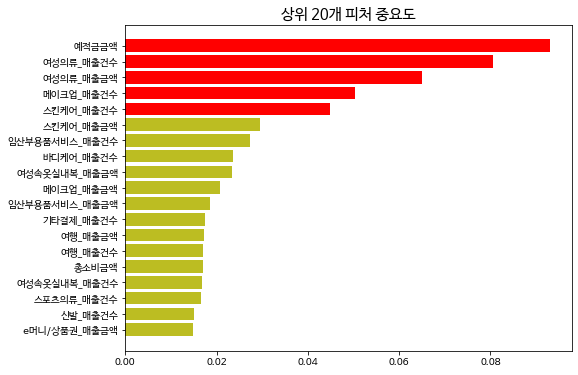

In [ ]:
featureImportance = baseline.feature_importances_

importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:olive')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()

### (1)-2. 성별 예측(법정동 고려 함)

In [ ]:
ogender = pd.get_dummies(data=df, columns=['법정동'], prefix=[''])
ogender

,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,모바일상품_매출금액,...,_전농동,_정릉동,_제기동,_종암동,_중계동,_중곡동,_중림동,_중화동,_증산동,_진관동,_창동,_창신동,_창전동,_천호동,_청담동,_청량리동,_청운동,_충무로4가,_충정로2가,_통의동,_팔판동,_풍납동,_하계동,_하왕십리동,_하월곡동,_한강로1가,_한남동,_합정동,_항동,_행당동,_홍은동,_홍제동,_화곡동,_화양동,_황학동,_회기동,_효창동,_후암동,_휘경동,_흑석동
0,1,20,0.000000,0.000000,0.017010,114.828263,0.068858,2368.782303,0.004089,52.129539,0.000000,0.000000,0.000000,0.000000,0.006869,140.997219,0.0,0.0,0.0,0.0,0.002781,43.640170,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.004089,220.393850,0.000000,0.000000,0.010958,948.474158,0.0,0.0,0.0,0.0,0.002126,44.049231,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,20,0.000000,0.000000,0.024207,566.784429,0.120216,4014.188911,0.002290,41.541871,0.001145,52.659470,0.001472,64.532221,0.002781,116.097645,0.0,0.0,0.0,0.0,0.002617,27.377985,0.000000,0.000000,0.0,0.0,0.000818,56.187766,0.003598,232.059208,0.000000,0.000000,0.011286,1293.103369,0.0,0.0,0.0,0.0,0.000818,13.273307,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,20,0.000654,19.136408,0.027151,952.164540,0.135100,3898.909225,0.003598,69.801276,0.000654,31.548250,0.001308,253.223749,0.003108,106.937193,0.0,0.0,0.0,0.0,0.002617,41.030422,0.002126,2.453386,0.0,0.0,0.000000,0.000000,0.004253,265.227674,0.000000,0.000000,0.011613,1509.706739,0.0,0.0,0.0,0.0,0.004089,55.230618,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,20,0.000000,0.000000,0.030749,348.570985,0.101570,3128.744194,0.001636,30.537291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008996,32.762349,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010141,407.840693,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,20,0.000000,0.000000,0.045306,873.300785,0.150147,3604.572784,0.002781,76.523716,0.001636,1186.610075,0.001472,58.602879,0.001472,31.763657,0.0,0.0,0.0,0.0,0.006869,45.068041,0.002617,4.786719,0.0,0.0,0.000000,0.000000,0.001963,78.998037,0.000164,0.000164,0.008832,888.749100,0.0,0.0,0.0,0.0,0.042525,427.436539,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,0,60,0.000000,0.000000,0.000000,0.000000,0.003946,88.909808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9013,1,60,0.000000,0.000000,0.000000,0.000000,0.005088,390.152629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9014,1,60,0.000000,0.000000,0.000000,0.000000,0.002842,525.085983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000

In [ ]:
X = ogender.iloc[:,2:]
y = ogender.iloc[:,[0]]

In [ ]:
y

,성별
0,1
1,1
2,1
3,1
4,1
...,...
9012,0
9013,1
9014,1
9015,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
k=pd.DataFrame(X_test_s)
k.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310
0,0.000000,0.000000,0.570407,0.308182,-0.025350,-0.098461,-0.429340,-0.384305,0.000000,0.000000,-0.089400,-0.138503,-0.243322,-0.190050,0.0,0.0,0.000000,0.000000,1.233786,0.888674,0.002875,3.679123,0.0,0.0,0.000000,0.000000,-0.137593,-0.105796,0.000120,0.000120,-0.008057,0.217679,0.744041,3.049467,0.000000,0.000000,-0.043418,-0.077785,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.029099,0.150036,1.688146,1.610777,2.375988,1.127081,0.000000,0.000000,1.924991,3.748032,0.638073,1.129263,0.0,0.0,0.000000,0.000000,-0.278019,-0.085728,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-0.137593,-0.105796,0.000000,0.000000,0.411643,-0.114877,0.000000,0.000000,3.617074,4.025746,1.704241,1.873232,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.003207,1874.360742,0.008219,0.619138,1.423208,1.264807,2.579082,2.809239,0.000000,0.000000,1.552901,6.140342,2.701702,2.335648,0.0,0.0,0.003207,145.439533,-0.278019,-0.085728,0.000000,0.000000,0.0,0.0,0.003207,154.596656,0.807852,2.054334,0.000229,0.000229,0.469078,0.528384,6.301027,27.094340,1.918723,1.693562,1.614739,1.298391,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,-0.403317,-0.355062,-0.467252,-0.460674,-0.501916,-0.463879,0.000000,0.000000,-0.310913,-0.206487,0.090865,0.115748,0.0,0.0,0.000000,0.000000,-0.278019,-0.085728,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-0.137593,-0.105796,0.000000,0.000000,-0.531073,-0.442091,0.000000,0.000000,0.000000,0.000000,-0.149275,-0.142103,0.859348,0.367011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.367067,0.347040,0.504567,0.924414,1.115878,0.923800,1.880016,1.966751,2.208379,2.230058,1.286409,1.103662,0.0,0.0,0.001771,106.899333,2.977364,4.505933,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.292398,0.309441,0.000000,0.000000,0.886027,0.243704,0.000000,0.000000,2.396404,2.440211,1.501819,2.574372,1.359510,0.303222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000861,12.335845,-0.225762,0.304942,-0.213681,-0.045838,0.345994,0.401321,1.061141,0.746412,0.385852,0.902937,0.704908,0.644010,0.0,0.0,0.000000,0.000000,-0.278019,-0.085728,0.000000,0.000000,0.0,0.0,0.000861,47.214209,0.359009,0.377355,0.000000,0.000000,-0.143982,-0.127045,0.764201,1.709370,0.721390,0.962264,0.013812,-0.029662,0.116771,0.125163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.001030,39.220077,-0.069719,-0.117223,0.739497,0.695940,1.057749,1.486009,1.184144,0.506086,0.974393,1.332467,1.807751,1.764150,0.0,0.0,0.000000,0.000000,0.155171,0.002717,0.000000,0.000000,0.0,0.0,0.001287,40.010296,0.549907,0.536803,0.000000,0.000000,0.278853,0.482258,1.598970,1.268981,1.725023,1.951955,0.825683,0.705621,0.558456,0.555951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.001096,32.092654,1.025838,1.828768,0.284647,0.219422,0.262140,0.218874,0.300256,0.092053,0.736817,1.173445,0.851824,0.5

In [ ]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train_s, y_train.to_numpy().ravel())

# make predictions on test set
y_pred=baseline.predict(X_test_s)

print(classification_report(y_test, y_pred)) ####0.82에서 scaling후 0.89로 성능 향상

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       928
           1       0.92      0.97      0.95       876

    accuracy                           0.95      1804
   macro avg       0.95      0.95      0.95      1804
weighted avg       0.95      0.95      0.95      1804



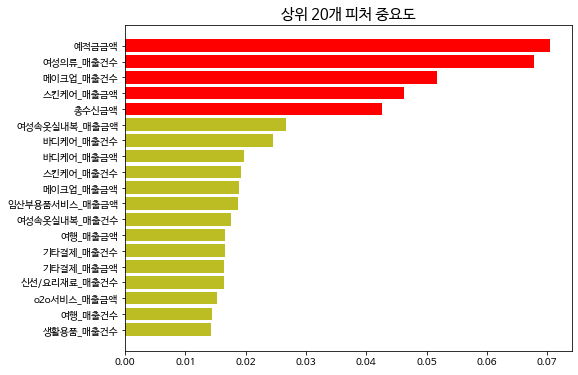

In [ ]:
featureImportance = baseline.feature_importances_

importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:olive')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()

### (2) 연령예측하기 (법정동 고려안함)

In [ ]:
df= pd.read_csv("refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])
df.head(5)

,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,기준년월
0,가락동,1,20,0.000000,0.000000,0.017010,114.828263,0.068858,2368.782303,0.004089,52.129539,0.000000,0.000000,0.000000,0.000000,0.006869,140.997219,0.0,0.0,0.0,0.0,0.002781,43.640170,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.004089,220.393850,0.000000,0.000000,0.010958,948.474158,0.0,0.0,0.0,0.0,0.002126,...,0.0,0.000000,0.000000,0.012267,427.973667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017010,778.046287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,17546.130435,0.0,0.0,800819.426087,1.848215e+06,2.789248e+06,0.0,0.000,0.0,0.0,0.0,0.0,1
1,가락동,1,20,0.000000,0.000000,0.024207,566.784429,0.120216,4014.188911,0.002290,41.541871,0.001145,52.659470,0.001472,64.532221,0.002781,116.097645,0.0,0.0,0.0,0.0,0.002617,27.377985,0.000000,0.000000,0.0,0.0,0.000818,56.187766,0.003598,232.059208,0.000000,0.000000,0.011286,1293.103369,0.0,0.0,0.0,0.0,0.000818,...,0.0,0.001636,107.793261,0.021753,1151.827936,0.001145,36.026824,0.001636,33.143932,0.0,0.0,0.000818,27.769709,0.000000,0.000000,0.029604,1281.505070,0.001145,75.415767,0.0,0.0,0.0,0.0,0.001963,95.888616,0.0,0,0.000000,0.0,0.0,850187.500000,1.928101e+06,3.027432e+06,0.0,0.000,0.0,0.0,0.0,0.0,2
2,가락동,1,20,0.000654,19.136408,0.027151,952.164540,0.135100,3898.909225,0.003598,69.801276,0.000654,31.548250,0.001308,253.223749,0.003108,106.937193,0.0,0.0,0.0,0.0,0.002617,41.030422,0.002126,2.453386,0.0,0.0,0.000000,0.000000,0.004253,265.227674,0.000000,0.000000,0.011613,1509.706739,0.0,0.0,0.0,0.0,0.004089,...,0.0,0.001472,82.424763,0.010631,382.457638,0.001145,29.183677,0.002944,48.214426,0.0,0.0,0.001472,59.417730,0.000818,47.794243,0.026333,1088.326955,0.002126,83.213935,0.0,0.0,0.0,0.0,0.002453,67.205921,0.0,0,21494.421488,0.0,0.0,689392.190083,2.168106e+06,2.778842e+06,0.0,0.000,0.0,0.0,0.0,0.0,3
3,가락동,1,20,0.000000,0.000000,0.030749,348.570985,0.101570,3128.744194,0.001636,30.537291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008996,32.762349,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010141,407.840693,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.001636,69.506542,0.014557,560.352797,0.001636,115.541871,0.000000,0.000000,0.0,0.0,0.001636,21.738469,0.000000,0.000000,0.032875,740.884527,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001636,91.046778,0.0,0,15855.512000,0.0,0.0,859755.704000,2.388974e+06,3.210482e+06,0.0,26700.408,0.0,0.0,0.0,0.0,4
4,가락동,1,20,0.000000,0.000000,0.045306,873.300785,0.150147,3604.572784,0.002781,76.523716,0.001636,1186.610075,0.001472,58.602879,0.001472,31.763657,0.0,0.0,0.0,0.0,0.006869,45.068041,0.002617,4.786719,0.0,0.0,0.000000,0.000000,0.001963,78.998037,0.000164,0.000164,0.008832,888.749100,0.0,0.0,0.0,0.0,0.042525,...,0.0,0.000818,36.832188,0.013085,450.886163,0.001636,50.379457,0.002290,49.319594,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.043343,1074.862938,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001145,22.582434,0.0,0,37360.203252,0.0,0.0,840075.455285,2.596431e+06,2.876002e+06,0.0,0.000,0.0,0.0,0.0,0.0,5


In [ ]:
X = df.iloc[:,3:]
y = df.iloc[:,[2]]
y

,연령
0,20
1,20
2,20
3,20
4,20
...,...
9012,60
9013,60
9014,60
9015,60


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)
baseline=random_forest

# fit classifier to training set
baseline.fit(X_train_s, y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test_s)

In [ ]:
##scaled 하고 정확도가 더 높아짐!
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          20       0.91      0.97      0.94       382
          30       0.88      0.79      0.83       365
          40       0.81      0.79      0.80       357
          50       0.88      0.93      0.90       363
          60       0.98      0.99      0.98       337

    accuracy                           0.89      1804
   macro avg       0.89      0.89      0.89      1804
weighted avg       0.89      0.89      0.89      1804



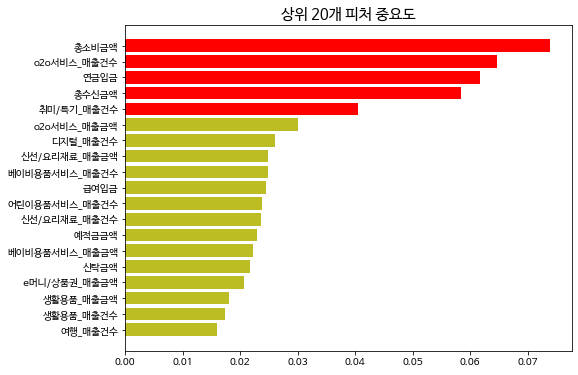

In [ ]:
featureImportance = baseline.feature_importances_

importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:olive')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()

### (2)-2 연령예측하기 (법정동 고려)

In [ ]:
ohv = pd.get_dummies(data=df, columns=['법정동'], prefix=[''])
ohv

,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,모바일상품_매출금액,...,_전농동,_정릉동,_제기동,_종암동,_중계동,_중곡동,_중림동,_중화동,_증산동,_진관동,_창동,_창신동,_창전동,_천호동,_청담동,_청량리동,_청운동,_충무로4가,_충정로2가,_통의동,_팔판동,_풍납동,_하계동,_하왕십리동,_하월곡동,_한강로1가,_한남동,_합정동,_항동,_행당동,_홍은동,_홍제동,_화곡동,_화양동,_황학동,_회기동,_효창동,_후암동,_휘경동,_흑석동
0,1,20,0.000000,0.000000,0.017010,114.828263,0.068858,2368.782303,0.004089,52.129539,0.000000,0.000000,0.000000,0.000000,0.006869,140.997219,0.0,0.0,0.0,0.0,0.002781,43.640170,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.004089,220.393850,0.000000,0.000000,0.010958,948.474158,0.0,0.0,0.0,0.0,0.002126,44.049231,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,20,0.000000,0.000000,0.024207,566.784429,0.120216,4014.188911,0.002290,41.541871,0.001145,52.659470,0.001472,64.532221,0.002781,116.097645,0.0,0.0,0.0,0.0,0.002617,27.377985,0.000000,0.000000,0.0,0.0,0.000818,56.187766,0.003598,232.059208,0.000000,0.000000,0.011286,1293.103369,0.0,0.0,0.0,0.0,0.000818,13.273307,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,20,0.000654,19.136408,0.027151,952.164540,0.135100,3898.909225,0.003598,69.801276,0.000654,31.548250,0.001308,253.223749,0.003108,106.937193,0.0,0.0,0.0,0.0,0.002617,41.030422,0.002126,2.453386,0.0,0.0,0.000000,0.000000,0.004253,265.227674,0.000000,0.000000,0.011613,1509.706739,0.0,0.0,0.0,0.0,0.004089,55.230618,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,20,0.000000,0.000000,0.030749,348.570985,0.101570,3128.744194,0.001636,30.537291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008996,32.762349,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010141,407.840693,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,20,0.000000,0.000000,0.045306,873.300785,0.150147,3604.572784,0.002781,76.523716,0.001636,1186.610075,0.001472,58.602879,0.001472,31.763657,0.0,0.0,0.0,0.0,0.006869,45.068041,0.002617,4.786719,0.0,0.0,0.000000,0.000000,0.001963,78.998037,0.000164,0.000164,0.008832,888.749100,0.0,0.0,0.0,0.0,0.042525,427.436539,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,0,60,0.000000,0.000000,0.000000,0.000000,0.003946,88.909808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9013,1,60,0.000000,0.000000,0.000000,0.000000,0.005088,390.152629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9014,1,60,0.000000,0.000000,0.000000,0.000000,0.002842,525.085983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000

In [ ]:
X = ohv.iloc[:,2:]
y = ohv.iloc[:,[1]]

In [ ]:
y

,연령
0,20
1,20
2,20
3,20
4,20
...,...
9012,60
9013,60
9014,60
9015,60


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
k=pd.DataFrame(X_train_s)
k

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310
0,0.000000,0.000000,-0.403317,-0.355062,-0.529870,-0.538192,-0.501916,-0.463879,0.000000,0.000000,-0.310913,-0.206487,-0.484700,-0.435355,0.000000,0.000000,0.000000,0.000000,-0.278019,-0.085728,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.137593,-0.105796,0.0,0.0,-0.531073,-0.442091,0.000000,0.000000,0.000000,0.000000,-0.149275,-0.142103,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,2.261398,7.566588,2.170649,1.873859,1.266361,1.093806,8.310895,4.579645,1.578078,0.604812,1.633769,1.945948,0.005837,68.802529,0.000000,0.000000,1.850214,1.433598,0.000000,0.000000,0.0,0.0,0.0,0.0,2.106297,3.779898,0.0,0.0,1.936356,1.464406,2.158143,1.463542,4.278210,2.543378,2.921180,2.787231,5.276265,5.366984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.599349,0.395107,0.154333,-0.045706,-0.367397,-0.411165,0.000000,0.000000,0.008423,-0.121456,-0.292272,-0.327396,0.000000,0.000000,0.000000,0.000000,1.008887,1.209003,0.002220,4.296991,0.0,0.0,0.0,0.0,0.700931,0.510572,0.0,0.0,0.245090,1.450841,0.000000,0.000000,0.000000,0.000000,0.504745,0.123496,0.642210,0.513440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.465428,-0.153683,-0.196905,0.297533,-0.260413,-0.241858,0.000000,0.000000,-0.310913,-0.206487,-0.303329,-0.306672,0.000000,0.000000,0.000000,0.000000,0.191514,0.179864,0.000000,0.000000,0.0,0.0,0.0,0.0,1.894716,3.593386,0.0,0.0,0.339126,0.546920,0.000000,0.000000,0.000000,0.000000,0.655872,0.269704,0.605309,0.373743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.002678,126.427314,-0.172318,-0.078734,1.167749,1.535030,2.268114,2.907597,3.016985,7.383489,0.396590,0.700639,1.716240,1.652980,0.000000,0.000000,0.001913,153.357116,0.719900,0.850516,0.000000,0.000000,0.0,0.0,0.0,0.0,0.977078,0.704291,0.0,0.0,0.807776,0.662751,2.376435,1.831477,2.163187,1.444153,0.768431,1.841211,2.697475,3.481791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7208,0.000000,0.000000,0.392136,0.016932,0.020759,-0.057417,-0.068765,-0.039030,1.044003,0.936072,-0.310913,-0.206487,-0.226525,-0.318309,0.000000,0.000000,0.000000,0.000000,-0.010673,-0.007520,0.001589,3.177125,0.0,0.0,0.0,0.0,0.344560,0.598702,0.0,0.0,-0.021021,0.281569,0.000000,0.000000,0.665381,1.528610,0.251859,0.201881,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7209,0.000000,0.000000,-0.403317,-0.355062,-0.410321,-0.321346,-0.229684,-0.207871,0.000000,0.000000,-0.004791,-0.099045,-0.023537,0.171882,0.000000,0.000000,0.000000,0.000000,-0.278019,-0.085728,0.000000,0.000000,0.0,0.0,0.0,0.0,0.149487,0.363397,0.0,0.0,-0.379228,-0.240603,0.000000,0.000000,0.000000,0.000000,0.119420,2.882697,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0

In [ ]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train_s, y_train.to_numpy().ravel())

# make predictions on test set
y_pred=baseline.predict(X_test_s)

print(classification_report(y_test, y_pred)) ####0.82에서 scaling후 0.89로 성능 향상

              precision    recall  f1-score   support

          20       0.92      0.97      0.95       382
          30       0.89      0.79      0.84       365
          40       0.83      0.83      0.83       357
          50       0.89      0.94      0.91       363
          60       0.98      0.98      0.98       337

    accuracy                           0.90      1804
   macro avg       0.90      0.90      0.90      1804
weighted avg       0.90      0.90      0.90      1804



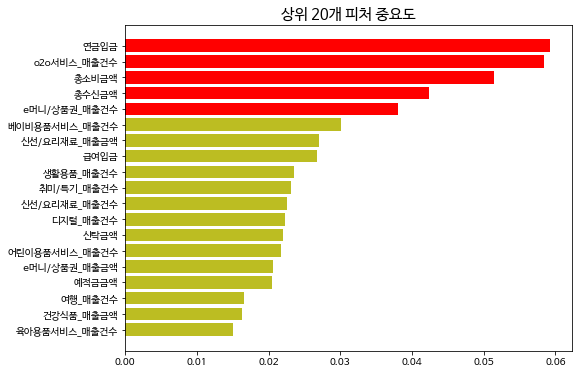

In [ ]:
featureImportance = baseline.feature_importances_

importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:olive')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()

### (3) 가구 형태 예측하기// 여기서는 다른 데이터를 사용해야할듯

In [ ]:
family=pd.read_csv("pattern(중분류코드값을 매출건수로 편집).csv").drop(columns=['Unnamed: 0','시군구','법정동코드','매출금액','품목_2110'])
family

,기준년월,성별,연령,가구생애주기,품목_1010,품목_1011,품목_1012,품목_1013,품목_1014,품목_1110,품목_1111,품목_1112,품목_1113,품목_1114,품목_1210,품목_1211,품목_1212,품목_1213,품목_1214,품목_1215,품목_1310,품목_1311,품목_1312,품목_1313,품목_1314,품목_1410,품목_1411,품목_1412,품목_1510,품목_1511,품목_1610,품목_1611,품목_1612,품목_1710,품목_1711,품목_1712,품목_1810,품목_1812,품목_1910,품목_1911,품목_1912,품목_1913,품목_2010,품목_2011,품목_2012,품목_2013,품목_2014,품목_2111,품목_2112,품목_9910,품목_9911,품목_9912,품목_9913
0,3,0,40.0,3,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,20.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,30.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,0,0,0,0,0,0,0,0,0
3,3,0,30.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,0,0,0,0,0
4,3,0,30.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306117,3,0,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0
306118,3,1,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306119,3,0,30.0,2,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306120,3,1,40.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X1=family.iloc[:,0:0]
X2=family.iloc[:,4:]
X=pd.concat([X1,X2],axis=1)
y=family.iloc[:,[3]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
from sklearn.model_selection  import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train_s, y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test_s)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.29      0.19      0.23     14814
           2       0.35      0.79      0.48     21289
           3       0.28      0.06      0.10     12151
           4       0.19      0.01      0.03      9478
           5       0.27      0.00      0.00      3493

    accuracy                           0.34     61225
   macro avg       0.28      0.21      0.17     61225
weighted avg       0.29      0.34      0.25     61225



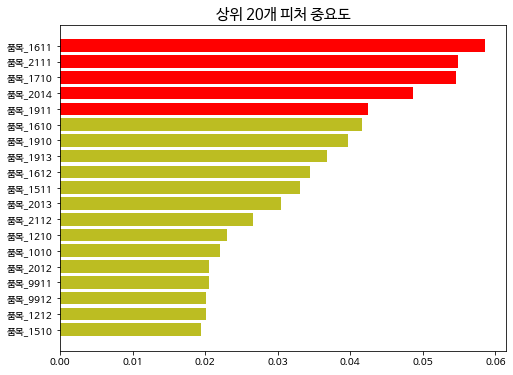

In [ ]:
##상위 20개 중요도
featureImportance = baseline.feature_importances_

importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:olive')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgbc = XGBClassifier(max_depth=7, n_estimators=50, colsample_bytree=0.5, learning_rate=0.1,subsample=0.8,min_child_weight=1) ### colsample_bytee, subsample 1로 두면 오버 피팅되어서 여기서는 정확도는 올라가는데 실제 점수는 더 낮음
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           1       0.41      0.03      0.05     14814
           2       0.35      0.98      0.51     21289
           3       0.47      0.01      0.02     12151
           4       0.00      0.00      0.00      9478
           5       0.00      0.00      0.00      3493

    accuracy                           0.35     61225
   macro avg       0.24      0.20      0.12     61225
weighted avg       0.31      0.35      0.19     61225



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


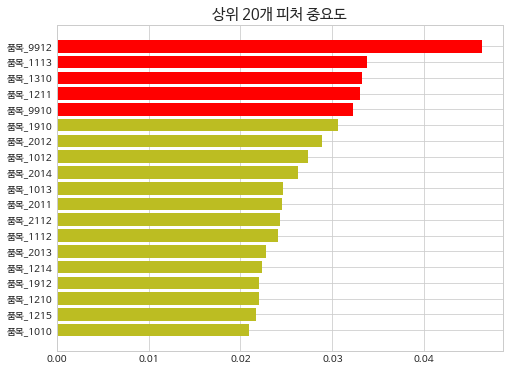

In [ ]:
##상위 20개 중요도
featureImportance = xgbc.feature_importances_
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

importances_values = xgbc.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:olive')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()

## **(B) XGBoost 방법**

(1)성별 예측하기

In [2]:
df= pd.read_csv("refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])

X = df.iloc[:,3:]
y = df.iloc[:,[1]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

NameError: ignored

Featrue Scailing을 진행

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

분류시작

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_clf = xgb.XGBClassifier()

# parameter 
xgb_param_grid = {'max_depth': [5,7,9], 
              'subsample': [0.6, 1.0],
              'n_estimators': [100,1000],
              'colsample_bytree': [0.5,0.8,1],
              'min_child_weight':[0.7, 1, 1.5, 2]}

# Create a GridSearchCV object
hr_grid = GridSearchCV(estimator=xgb_clf,
                       param_grid=xgb_param_grid,
                       scoring='roc_auc',
                       n_jobs=-1,
                       cv=3,
                       refit=True, 
                       return_train_score=True)

In [ ]:
hr_grid.fit(X_train_s, y_train)
hr_grid_df = pd.DataFrame(hr_grid.cv_results_)
hr_grid_df.loc[:, ['mean_test_score', "params"]]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,mean_test_score,params
0,0.991034,"{'colsample_bytree': 0.5, 'max_depth': 5, 'min..."
1,0.991315,"{'colsample_bytree': 0.5, 'max_depth': 5, 'min..."
2,0.990342,"{'colsample_bytree': 0.5, 'max_depth': 5, 'min..."
3,0.990675,"{'colsample_bytree': 0.5, 'max_depth': 5, 'min..."
4,0.990947,"{'colsample_bytree': 0.5, 'max_depth': 5, 'min..."
...,...,...
139,0.990256,"{'colsample_bytree': 1, 'max_depth': 9, 'min_c..."
140,0.991081,"{'colsample_bytree': 1, 'max_depth': 9, 'min_c..."
141,0.991099,"{'colsample_bytree': 1, 'max_depth': 9, 'min_c..."
142,0.989929,"{'colsample_bytree': 1, 'max_depth': 9, 'min_c..."


In [1]:
hr_grid_df.sort_values(by = 'mean_test_score', ascending=False).head(5)

NameError: ignored

In [ ]:
xgbc = XGBClassifier(max_depth=5, n_estimators=100, colsample_bytree=0.5, learning_rate=0.1,subsample=1,min_child_weight=1.5) 
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       928
           1       0.94      0.97      0.95       876

    accuracy                           0.95      1804
   macro avg       0.95      0.96      0.95      1804
weighted avg       0.96      0.95      0.95      1804



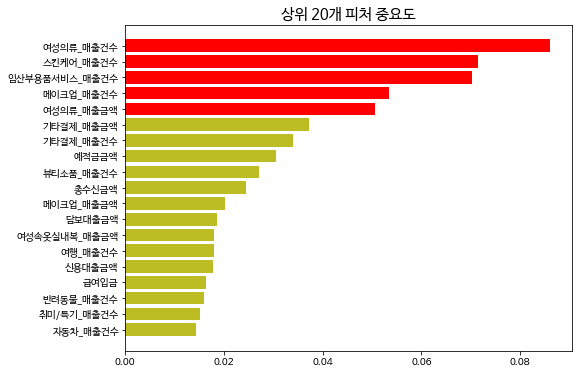

In [ ]:
##상위 20개 중요도
featureImportance = xgbc.feature_importances_
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

importances_values = xgbc.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:olive')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()

트리구조를 파악해서 각 노드들의 경계값을 파악해서 분석하고자 하는 대상의 피처를 구분짓는 임계점을 알아 낼 수 있다.

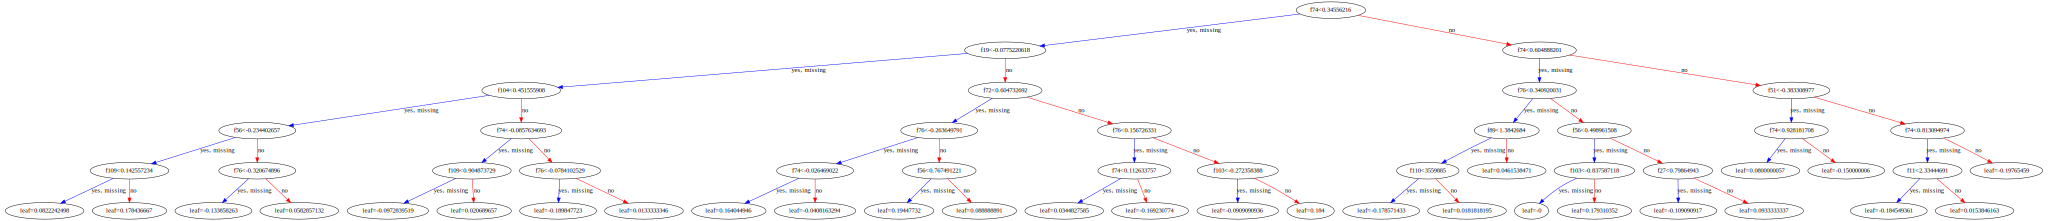

In [ ]:
##첫번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph

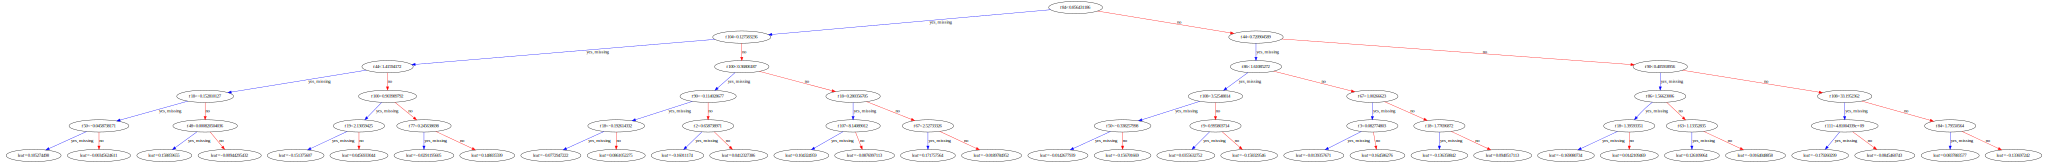

In [ ]:
##두번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=1)
graph = graphviz.Source(dot_data)
graph

상위 5개만 추출하여 진행

In [ ]:
df= pd.read_csv("refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])

X = df[['여성의류_매출건수', '스킨케어_매출건수','임산부용품서비스_매출건수','메이크업_매출건수','여성의류_매출금액']]
y = df.iloc[:,[1]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier(max_depth=5, n_estimators=100, colsample_bytree=0.5, learning_rate=0.1,subsample=1,min_child_weight=1.5) 
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       928
           1       0.94      0.97      0.95       876

    accuracy                           0.95      1804
   macro avg       0.95      0.96      0.95      1804
weighted avg       0.96      0.95      0.95      1804



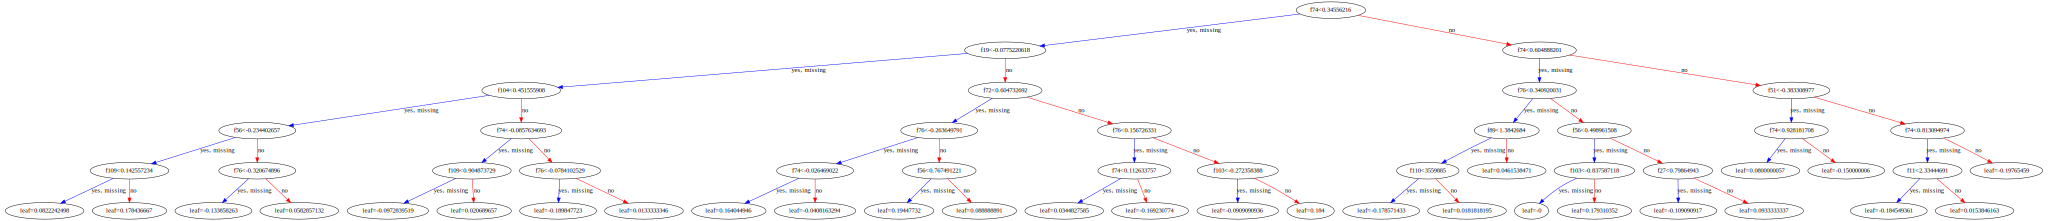

In [ ]:
import graphviz
##첫번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph

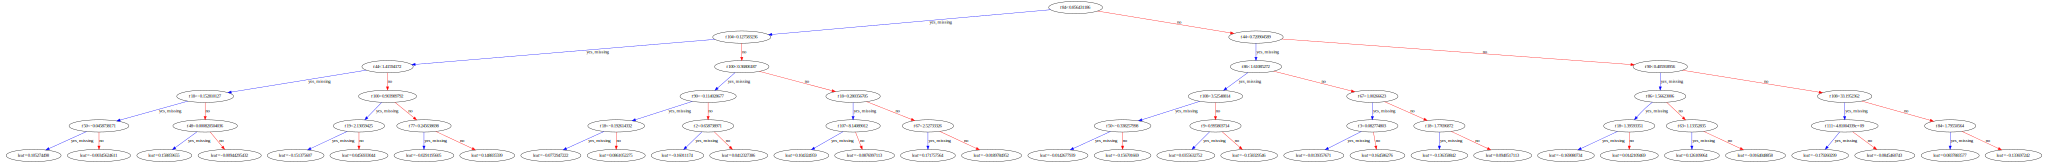

In [ ]:
##두번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=1)
graph = graphviz.Source(dot_data)
graph

### (2) 연령 예측하기

In [ ]:
df= pd.read_csv("refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])

X = df.iloc[:,3:]
y = df.iloc[:,[2]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Featrue Scailing을 진행

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

분류시작

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_clf = xgb.XGBClassifier()

# parameter 
xgb_param_grid = {'max_depth': [5,7,9], 
              'subsample': [0.6, 1.0],
              'n_estimators': [100,1000],
              'colsample_bytree': [0.5,0.8,1],
              'min_child_weight':[0.7, 1, 1.5, 2]}

# Create a GridSearchCV object
hr_grid = GridSearchCV(estimator=xgb_clf,
                       param_grid=xgb_param_grid,
                       scoring='f1_macro',
                       n_jobs=-1,
                       cv=2,
                       refit=True, 
                       return_train_score=True)

In [ ]:
# from sklearn.metrics import SCORERS
# sorted(SCORERS.keys())

In [ ]:
# hr_grid.fit(X_train_s, y_train)
# hr_grid_df = pd.DataFrame(hr_grid.cv_results_)
# hr_grid_df.loc[:, ['mean_test_score', "params"]]

In [ ]:
# hr_grid_df.sort_values(by = 'mean_test_score', ascending=False).head(5)

In [ ]:
xgbc = XGBClassifier(max_depth=5, n_estimators=100, colsample_bytree=0.5, learning_rate=0.1,subsample=1,min_child_weight=1.5) 
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

          20       0.94      0.96      0.95       382
          30       0.92      0.81      0.86       365
          40       0.83      0.86      0.84       357
          50       0.88      0.93      0.91       363
          60       0.99      0.99      0.99       337

    accuracy                           0.91      1804
   macro avg       0.91      0.91      0.91      1804
weighted avg       0.91      0.91      0.91      1804



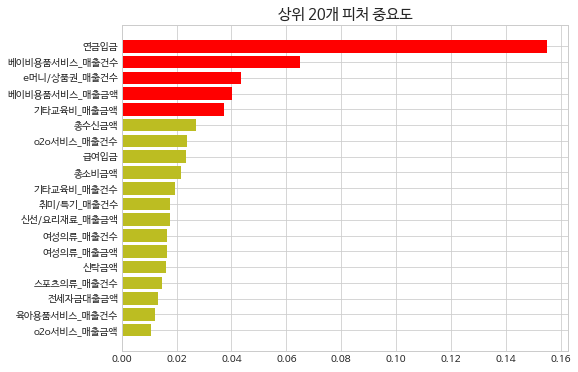

In [ ]:
##상위 20개 중요도
featureImportance = xgbc.feature_importances_
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

importances_values = xgbc.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:olive')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()

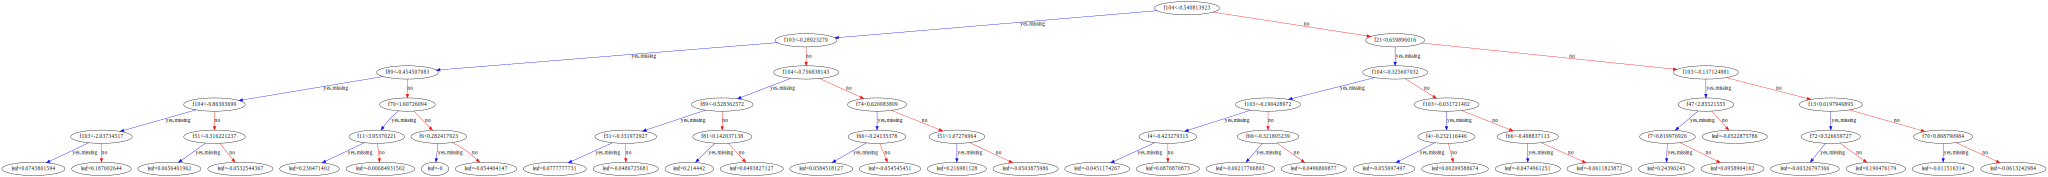

In [ ]:
##첫번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph

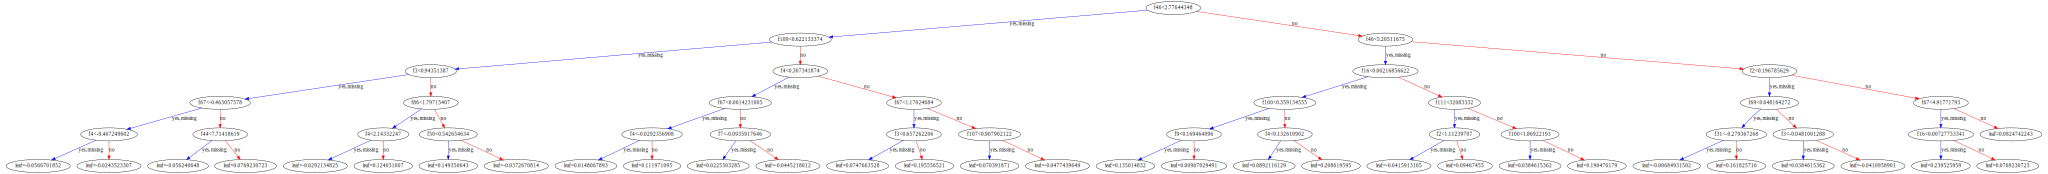

In [ ]:
##두번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=1)
graph = graphviz.Source(dot_data)
graph

상위 5개만 추출하여 진행(Tree depth 3단계로 줄여봄, 트리구조를 파악하기 위해서 accuracy는 0.01감소)

In [ ]:
df= pd.read_csv("refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])

X = df[['연금입금', '베이비용품서비스_매출건수',' e머니/상품권_매출건수','베이비용품서비스_매출금액','기타교육비_매출금액']]
y = df.iloc[:,[2]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier(max_depth=3, n_estimators=100, colsample_bytree=0.5, learning_rate=0.1,subsample=1,min_child_weight=1.5) 
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

          20       0.91      0.95      0.93       382
          30       0.90      0.80      0.85       365
          40       0.83      0.81      0.82       357
          50       0.86      0.94      0.90       363
          60       0.98      0.98      0.98       337

    accuracy                           0.90      1804
   macro avg       0.90      0.90      0.90      1804
weighted avg       0.90      0.90      0.90      1804



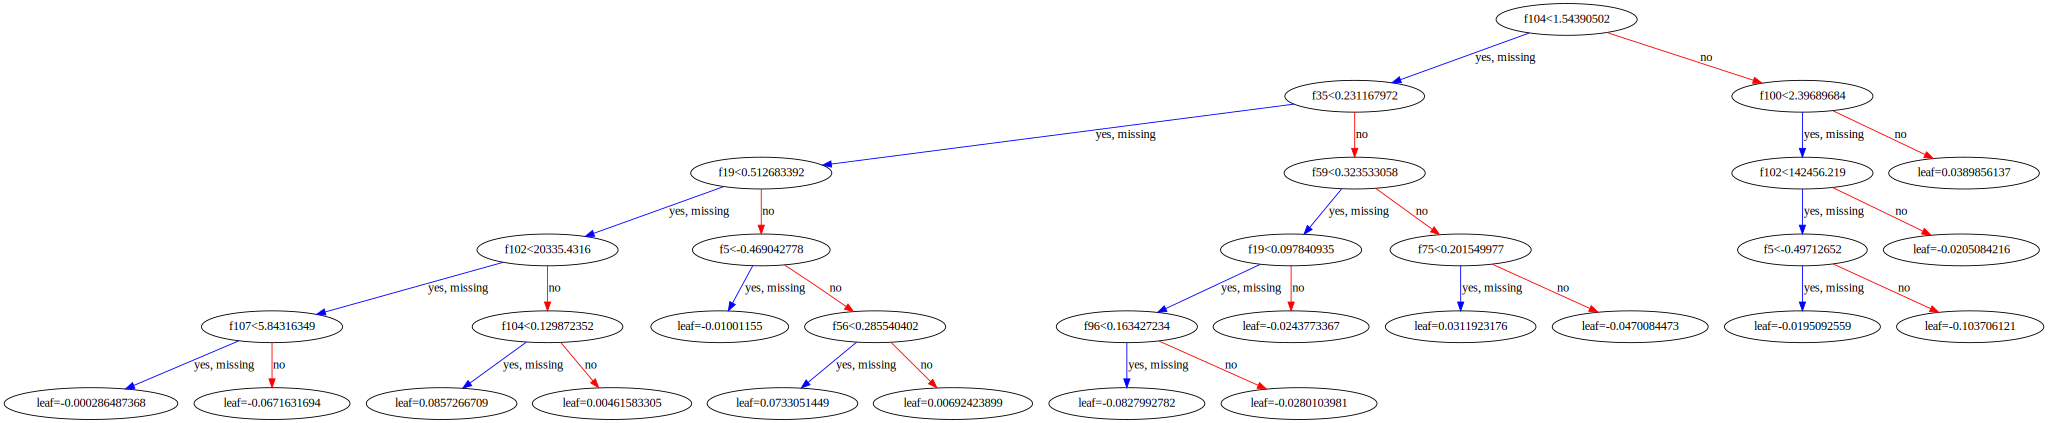

In [ ]:
import graphviz
##첫번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph

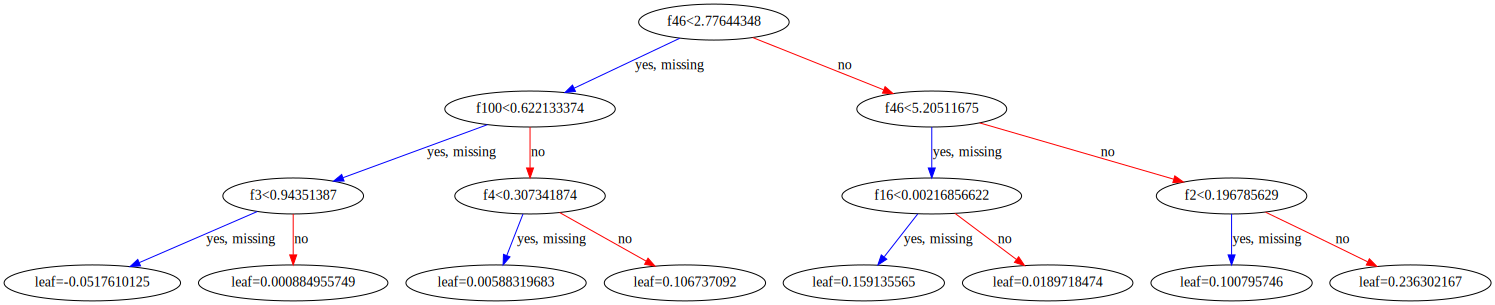

In [ ]:
##두번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=1)
graph = graphviz.Source(dot_data)
graph

### (3) 가구형태 예측하기

In [ ]:
family=pd.read_csv("pattern(중분류코드값을 매출건수로 편집).csv").drop(columns=['Unnamed: 0','시군구','법정동코드','매출금액','품목_2110'])
family

,기준년월,성별,연령,가구생애주기,품목_1010,품목_1011,품목_1012,품목_1013,품목_1014,품목_1110,품목_1111,품목_1112,품목_1113,품목_1114,품목_1210,품목_1211,품목_1212,품목_1213,품목_1214,품목_1215,품목_1310,품목_1311,품목_1312,품목_1313,품목_1314,품목_1410,품목_1411,품목_1412,품목_1510,품목_1511,품목_1610,품목_1611,품목_1612,품목_1710,품목_1711,품목_1712,품목_1810,품목_1812,품목_1910,품목_1911,품목_1912,품목_1913,품목_2010,품목_2011,품목_2012,품목_2013,품목_2014,품목_2111,품목_2112,품목_9910,품목_9911,품목_9912,품목_9913
0,3,0,40.0,3,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,20.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,30.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,0,0,0,0,0,0,0,0,0
3,3,0,30.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,0,0,0,0,0
4,3,0,30.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306117,3,0,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0
306118,3,1,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306119,3,0,30.0,2,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306120,3,1,40.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X1=family.iloc[:,0:0]
X2=family.iloc[:,4:]
X=pd.concat([X1,X2],axis=1)
y=family.iloc[:,[3]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgbc = XGBClassifier(max_depth=5, n_estimators=100, colsample_bytree=0.5, learning_rate=0.1,subsample=1,min_child_weight=1.5)
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           1       0.51      0.02      0.04     14814
           2       0.35      0.99      0.51     21289
           3       0.44      0.01      0.02     12151
           4       0.00      0.00      0.00      9478
           5       0.00      0.00      0.00      3493

    accuracy                           0.35     61225
   macro avg       0.26      0.20      0.11     61225
weighted avg       0.33      0.35      0.19     61225



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


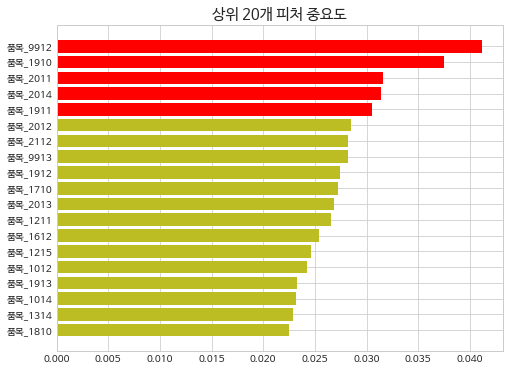

In [ ]:
##상위 20개 중요도
featureImportance = xgbc.feature_importances_
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

importances_values = xgbc.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:olive')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()

PCA진행하여 가구형태를 예측하는데 중요하게 작용하는 구매품목 추출

In [ ]:
family=pd.read_csv("pattern(중분류코드값을 매출건수로 편집).csv").drop(columns=['Unnamed: 0','시군구','법정동코드','매출금액','품목_2110'])
family

,기준년월,성별,연령,가구생애주기,품목_1010,품목_1011,품목_1012,품목_1013,품목_1014,품목_1110,품목_1111,품목_1112,품목_1113,품목_1114,품목_1210,품목_1211,품목_1212,품목_1213,품목_1214,품목_1215,품목_1310,품목_1311,품목_1312,품목_1313,품목_1314,품목_1410,품목_1411,품목_1412,품목_1510,품목_1511,품목_1610,품목_1611,품목_1612,품목_1710,품목_1711,품목_1712,품목_1810,품목_1812,품목_1910,품목_1911,품목_1912,품목_1913,품목_2010,품목_2011,품목_2012,품목_2013,품목_2014,품목_2111,품목_2112,품목_9910,품목_9911,품목_9912,품목_9913
0,3,0,40.0,3,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,20.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,30.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,0,0,0,0,0,0,0,0,0
3,3,0,30.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,0,0,0,0,0
4,3,0,30.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306117,3,0,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0
306118,3,1,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306119,3,0,30.0,2,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306120,3,1,40.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X1=family.iloc[:,0:0]
X2=family.iloc[:,4:]
X=pd.concat([X1,X2],axis=1)
y=family.iloc[:,[3]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

xgbc=XGBClassifier(max_depth=5, n_estimators=100, colsample_bytree=0.5, learning_rate=0.1,subsample=1,min_child_weight=1.5)
xgbc.fit(X_train_s,y_train)

selector =RFE(xgbc, n_features_to_select=10)
selector = selector.fit(X_test_s, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
selector.support_  

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True, False])

In [ ]:
##피처들의 순위
selector.ranking_

array([24, 33, 30, 36, 34, 14, 18, 39, 22,  8, 37, 19, 21, 27,  2,  7, 42,
       28, 44, 38, 31, 40, 11, 41, 10,  3,  9,  1, 13,  1, 15, 23,  5, 35,
        1, 12, 25, 17, 26, 16, 20,  4,  1,  1,  6, 29, 43,  1, 32])

In [ ]:
###PCA이후에 중요 피처 열이름 추출
i=0
coln=[]
for i in range(0,49):
  if selector.support_[i]==True:
    a=X.iloc[[0],[i]].any(axis=0).index.values
    i+=1
    coln.append(a[0])
  else:
    i+=1

In [ ]:
coln

['품목_1611', '품목_1710', '품목_1910', '품목_2014', '품목_2111', '품목_9912']

중요 10개 피처들: '향수(품목_1214)',  디지털('품목_1511'), 신선/요리재료('품목_1611'),생활용품('품목_1710'), 건강식품('품목_1810'),베이비용품서비스('품목_1910'), 여행('품목_2013'),취미/특기('품목_2014'),  e머니/상품권('품목_2111'),  기타교육비('품목_9912')
이것들만 가지고 다시 예측 분류기를 수행

In [ ]:
X=family[['품목_1214','품목_1511','품목_1611','품목_1710','품목_1810','품목_1910','품목_2013','품목_2014','품목_2111','품목_9912']]
y=family.iloc[:,[3]]

In [ ]:
y

,가구생애주기
0,3
1,2
2,2
3,2
4,2
...,...
306117,1
306118,1
306119,2
306120,3


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
##탐색시간이 너무 오래 거려서 PASS
# xgb_clf = xgb.XGBClassifier()

# # parameter 
# xgb_param_grid = {'max_depth': [5,7,9], 
#               'subsample': [0.6, 1.0],
#               'n_estimators': [100,1000],
#               'colsample_bytree': [0.5,0.8,1],
#               'min_child_weight':[0.7, 1, 1.5, 2]}

# # Create a GridSearchCV object
# hr_grid = GridSearchCV(estimator=xgb_clf,
#                        param_grid=xgb_param_grid,
#                        scoring='f1_macro',
#                        n_jobs=-1,
#                        cv=2,
#                        refit=True, 
#                        return_train_score=True)

In [ ]:
##탐색시간이 너무 오래 거려서 PASS
# hr_grid.fit(X_train_s, y_train)
# hr_grid_df = pd.DataFrame(hr_grid.cv_results_)
# hr_grid_df.loc[:, ['mean_test_score', "params"]]

In [ ]:
# hr_grid_df.sort_values(by = 'mean_test_score', ascending=False).head(5)

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgbc = XGBClassifier(max_depth=5, n_estimators=100, colsample_bytree=0.5, learning_rate=0.1,subsample=1,min_child_weight=1.5)
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [ ]:
from sklearn. metrics import classification_report  #0.35였음 4번 0.14이고
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           1       0.33      0.06      0.11     14814
           2       0.35      0.96      0.51     21289
           3       0.39      0.01      0.01     12151
           4       0.00      0.00      0.00      9478
           5       0.00      0.00      0.00      3493

    accuracy                           0.35     61225
   macro avg       0.21      0.21      0.13     61225
weighted avg       0.28      0.35      0.21     61225



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


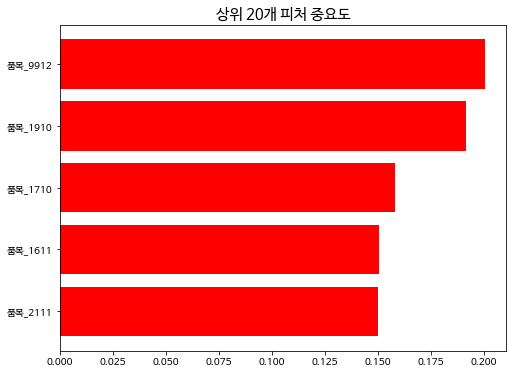

In [ ]:
##상위 5개 중요도
featureImportance = xgbc.feature_importances_
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

importances_values = xgbc.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 5개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:olive')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()

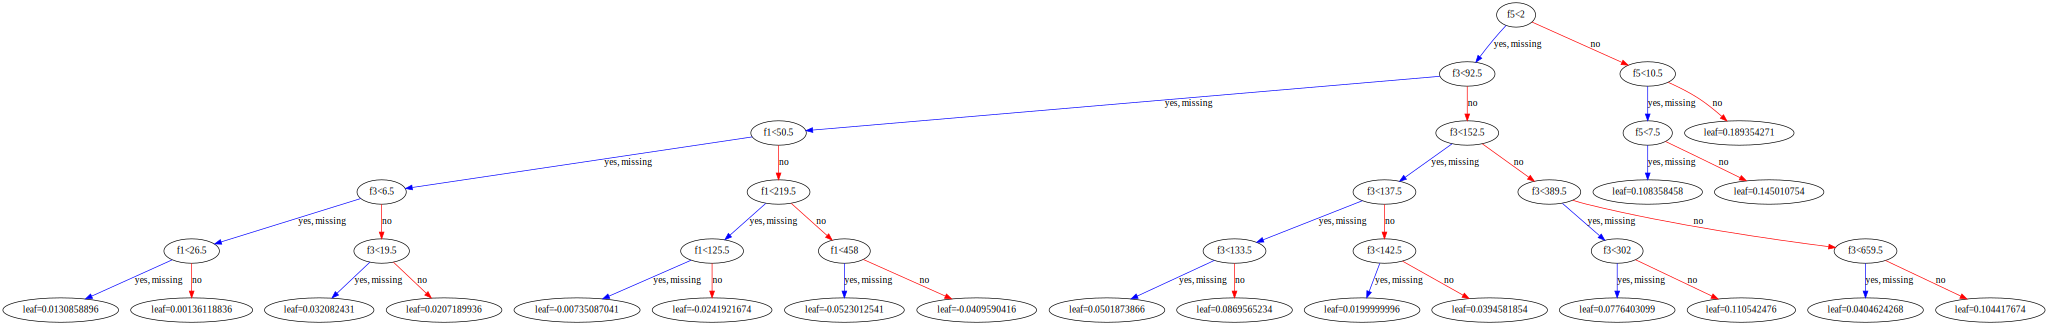

In [ ]:
##첫번째 트리구조
import graphviz 
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph

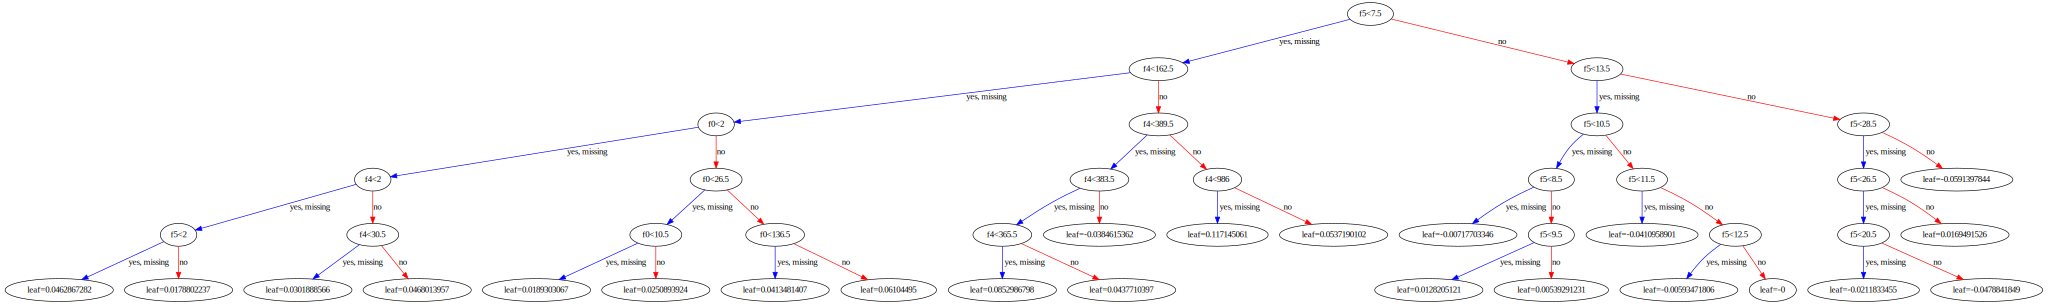

In [ ]:
##두번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=1)
graph = graphviz.Source(dot_data)
graph

# 4. 머신러닝 회귀 모형
      1. 특정품목 ~~ 다른 품목들간의 관계 우선 3가지 정도 분석해보기
      2. 여행~~ 금융자산정보
      3. 여가~~ 금융자산정보
      4.구매력(총수신금액)~ 구매물품 정보 : 구매품을 분석해서 개인의 구매력 예측가능

      수용이가 진행한 피처 셀렉션 참고해서 회귀분석 해보기 

### (1) 특정 품목과 관련있는 구매패턴 분석 >> 수용파트

### (2). 여행매출~ 금융자산정보 회귀 분석

In [ ]:
df= pd.read_csv("refined_data.csv").drop(columns=["Unnamed: 0","n", '법정동'])
df

,기준년월,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여성속옷실내복_매출건수,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,1,1,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,0,0,67,5798971,0,0,0,0,13,...,0,0,0,0,75,2616631.0,0,0,0,0,0,0,0,0,0,0,104,4756975,0,0.0,0,0,0,0,0,0,0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.000000e+00,0,0.0
1,1,1,30,21,1080521,196,3600015.0,1668,59595901,108,9026481,0,0,100,39755142,117,4135460,0,0.0,25,567484,42,1015110,0,0,0,0,0,0,21,957182,0,0,179,16190891,17,430116,0,0,38,...,0,0,25,830798,191,14826786.0,217,5987547,83,2626345,25,1594809,17,668324,29,471401,125,9718752,46,3075242.0,13,6226610,33,4203398,42,5478900,0,0,180731220,0,0.0,542263647,1733864271,1.801342e+09,27558987.0,0,412696176.0,2.196871e+09,0,0.0
2,1,1,40,21,697386,104,4246085.0,867,38478365,121,4147988,0,0,67,5106545,162,32823629,0,0.0,25,847366,63,506408,0,0,0,0,0,0,29,1517266,0,0,158,6323198,21,1207176,0,0,38,...,0,0,33,949035,105,9799656.0,87,2745620,96,3029070,25,4572509,21,576698,17,315802,84,12363378,63,2511968.0,0,0,0,0,29,1282589,0,0,122834583,0,0.0,499549200,1690930581,7.602494e+08,396429036.0,41064933,586295709.0,1.179034e+09,1469238294,0.0
3,1,1,50,17,2773427,58,2648983.0,221,10348725,29,2016253,0,0,25,5518572,38,3209088,0,0.0,0,0,442,2767466,0,0,0,0,0,0,17,968584,0,0,54,11018000,13,682882,0,0,0,...,0,0,0,0,29,3236812.0,25,359368,38,926352,0,0,0,0,0,0,92,6889960,17,1045485.0,0,0,0,0,0,0,0,0,60371844,6961017,0.0,546344004,1582574676,5.228890e+08,807396303.0,34321524,261313674.0,2.075667e+09,724597086,0.0
4,1,1,60,0,0,0,0.0,29,1317362,0,0,0,0,0,0,0,0,0,0.0,0,0,142,115481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,46,10488912,0,0.0,0,0,0,0,0,0,0,0,9518316,13826772,65234532.0,586165779,2645038200,9.619000e+08,791406597.0,0,299537916.0,1.366055e+09,627738162,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,5,1,50,0,0,0,0.0,0,0,0,0,0,0,0,0,5,157459,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,7565973,21540136,1.691960e+07,0.0,0,0.0,0.000000e+00,0,0.0
14468,5,0,20,0,0,19,363764.0,179,5707264,14,269817,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,266084,0,0,0,0,0,...,5,334677,0,0,12,1026043.0,0,0,0,0,0,0,0,0,0,0,0,0,7,289857.0,0,0,0,0,5,432260,0,0,0,0,0.0,8887386,14462496,1.505395e+07,0.0,0,0.0,0.000000e+00,0,0.0
14469,5,0,30,0,0,10,299624.0,201,8010103,17,657255,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,1278523,0,0,0,0,0,...,0,0,0,0,0,0.0,9,821315,9,329255,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,6467308,0,0.0,15377193,63203897,4.582949e+07,0.0,0,0.0,0.000000e+00,0,0.0
14470,5,0,40,0,0,27,501504.0,120,7970038,12,353441,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,10,564135,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,9113575,29198407,1.760240e+07,4008189.0,1058035,17024229.0,1.328604e+08,0,0.0


In [ ]:
X=df.iloc[:,103:]
y=df['여행_매출건수']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

X_train_s=pd.DataFrame(X_train_s)
X_test_s=pd.DataFrame(X_test_s)

**PCA를 통해 여행매출에 주요하게 영향을 미치는 금융자산 요소 3가지 추출**

In [ ]:
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

rg=XGBRegressor()
rg.fit(X_train_s,y_train)

selector =RFE(rg, n_features_to_select=3)
selector = selector.fit(X_test_s, y_test)

[13:02:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:02:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:02:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:02:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:02:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
selector.support_ 

array([ True, False,  True,  True, False, False, False, False, False,
       False, False, False])

In [ ]:
##피처들의 순위
selector.ranking_

array([ 1, 10,  1,  1,  5,  2,  3,  8,  7,  6,  9,  4])

In [ ]:
###PCA이후에 중요 피처 열이름 추출
i=0
coln=[]
for i in range(0,12):
  if selector.support_[i]==True:
    a=X.iloc[[0],[i]].any(axis=0).index.values
    i+=1
    coln.append(a[0])
  else:
    i+=1

In [ ]:
coln

['급여입금', '연금입금', '총소비금액']

**추출한 요소들을 가지고 회귀 분석**

In [ ]:
X=df[['급여입금','연금입금','총수신금액']]
y=df['여행_매출건수']

여러 회귀 모델을 준비

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

X_train_s=pd.DataFrame(X_train_s)
X_test_s=pd.DataFrame(X_test_s)

1.RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

lm=RandomForestRegressor()
lm.fit(X_train_s, y_train)
predictions = lm.predict(X_test_s)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 20.36707484168106
MSE: 1508.5855127240452
RMSE: 38.84051380612833
R^2: 0.561


2.XGBRegressor

In [ ]:
from xgboost import XGBRegressor
lm = XGBRegressor()
lm.fit(X_train_s, y_train)
predictions = lm.predict(X_test_s)

[13:03:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#XGBoost 성능
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 19.35100634691011
MSE: 1425.4427872590386
RMSE: 37.75503658134949
R^2: 0.585


3. LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_s, y_train)
predictions = lm.predict(X_test_s)

In [ ]:
print(lm.intercept_) 
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)

20.90521832296825
        Coefficient
급여입금   1.566873e+00
연금입금  -5.100546e-07
총수신금액  6.396722e+00


In [ ]:
predictions = lm.predict(X_test_s)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 27.08851029609519
MSE: 1903.7283551404537
RMSE: 43.63173564208114
R^2: 0.445


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


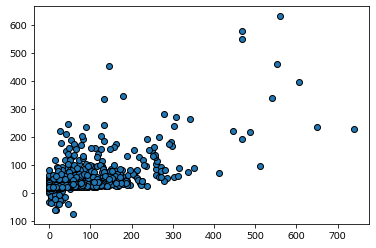

In [ ]:
predictions = lm.predict(X_test_s)
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions, edgecolor='black')

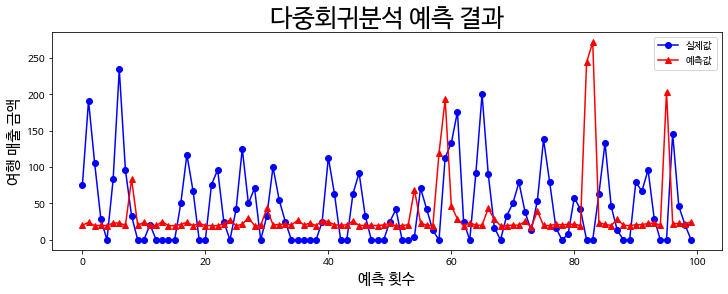

In [ ]:
fig=plt.figure(figsize=(12,4))
graph=fig.add_subplot(1,1,1)
graph.plot(y[0:100], marker='o', color='blue', label='실제값')
graph.plot(predictions[0:100], marker='^', color='red', label='예측값')
graph.set_title('다중회귀분석 예측 결과', size=25)
plt.xlabel('예측 횟수', size=15)
plt.ylabel('여행 매출 금액', size=15)
plt.legend(loc='best')

### (3). 취미_매출금액~ 금융자산정보 회귀 분석

In [ ]:
df= pd.read_csv("refined_data.csv").drop(columns=["Unnamed: 0","n", '법정동'])
df

,기준년월,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여성속옷실내복_매출건수,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,1,1,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,0,0,67,5798971,0,0,0,0,13,...,0,0,0,0,75,2616631.0,0,0,0,0,0,0,0,0,0,0,104,4756975,0,0.0,0,0,0,0,0,0,0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.000000e+00,0,0.0
1,1,1,30,21,1080521,196,3600015.0,1668,59595901,108,9026481,0,0,100,39755142,117,4135460,0,0.0,25,567484,42,1015110,0,0,0,0,0,0,21,957182,0,0,179,16190891,17,430116,0,0,38,...,0,0,25,830798,191,14826786.0,217,5987547,83,2626345,25,1594809,17,668324,29,471401,125,9718752,46,3075242.0,13,6226610,33,4203398,42,5478900,0,0,180731220,0,0.0,542263647,1733864271,1.801342e+09,27558987.0,0,412696176.0,2.196871e+09,0,0.0
2,1,1,40,21,697386,104,4246085.0,867,38478365,121,4147988,0,0,67,5106545,162,32823629,0,0.0,25,847366,63,506408,0,0,0,0,0,0,29,1517266,0,0,158,6323198,21,1207176,0,0,38,...,0,0,33,949035,105,9799656.0,87,2745620,96,3029070,25,4572509,21,576698,17,315802,84,12363378,63,2511968.0,0,0,0,0,29,1282589,0,0,122834583,0,0.0,499549200,1690930581,7.602494e+08,396429036.0,41064933,586295709.0,1.179034e+09,1469238294,0.0
3,1,1,50,17,2773427,58,2648983.0,221,10348725,29,2016253,0,0,25,5518572,38,3209088,0,0.0,0,0,442,2767466,0,0,0,0,0,0,17,968584,0,0,54,11018000,13,682882,0,0,0,...,0,0,0,0,29,3236812.0,25,359368,38,926352,0,0,0,0,0,0,92,6889960,17,1045485.0,0,0,0,0,0,0,0,0,60371844,6961017,0.0,546344004,1582574676,5.228890e+08,807396303.0,34321524,261313674.0,2.075667e+09,724597086,0.0
4,1,1,60,0,0,0,0.0,29,1317362,0,0,0,0,0,0,0,0,0,0.0,0,0,142,115481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,46,10488912,0,0.0,0,0,0,0,0,0,0,0,9518316,13826772,65234532.0,586165779,2645038200,9.619000e+08,791406597.0,0,299537916.0,1.366055e+09,627738162,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,5,1,50,0,0,0,0.0,0,0,0,0,0,0,0,0,5,157459,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,7565973,21540136,1.691960e+07,0.0,0,0.0,0.000000e+00,0,0.0
14468,5,0,20,0,0,19,363764.0,179,5707264,14,269817,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,266084,0,0,0,0,0,...,5,334677,0,0,12,1026043.0,0,0,0,0,0,0,0,0,0,0,0,0,7,289857.0,0,0,0,0,5,432260,0,0,0,0,0.0,8887386,14462496,1.505395e+07,0.0,0,0.0,0.000000e+00,0,0.0
14469,5,0,30,0,0,10,299624.0,201,8010103,17,657255,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,1278523,0,0,0,0,0,...,0,0,0,0,0,0.0,9,821315,9,329255,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,6467308,0,0.0,15377193,63203897,4.582949e+07,0.0,0,0.0,0.000000e+00,0,0.0
14470,5,0,40,0,0,27,501504.0,120,7970038,12,353441,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,10,564135,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,9113575,29198407,1.760240e+07,4008189.0,1058035,17024229.0,1.328604e+08,0,0.0


In [ ]:
X=df.iloc[:,103:]
y=df['취미/특기_매출건수']

In [ ]:
y

0        104
1        125
2         84
3         92
4         46
        ... 
14467      0
14468      0
14469      0
14470     10
14471      0
Name: 취미/특기_매출건수, Length: 14472, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

X_train_s=pd.DataFrame(X_train_s)
X_test_s=pd.DataFrame(X_test_s)

**PCA를 통해 취미/특기 매출액에 영향을 미치는 3가지 중요 금융자산 정보를 추출**

In [ ]:
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

rg=XGBRegressor()
rg.fit(X_train_s,y_train)

selector =RFE(rg, n_features_to_select=3)
selector = selector.fit(X_test_s, y_test)

[12:59:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
selector.support_ 

array([False, False,  True,  True, False, False,  True, False, False,
       False, False, False])

In [ ]:
##피처들의 순위
selector.ranking_

array([ 3, 10,  1,  1,  7,  2,  1,  9,  8,  6,  5,  4])

In [ ]:
###PCA이후에 중요 피처 열이름 추출
i=0
coln=[]
for i in range(0,12):
  if selector.support_[i]==True:
    a=X.iloc[[0],[i]].any(axis=0).index.values
    i+=1
    coln.append(a[0])
  else:
    i+=1

In [ ]:
coln

['연금입금', '총소비금액', '신탁금액']

**추출한 요소들을 바탕으로 회귀 분석 진행**

In [ ]:
X=df[['총소비금액','연금입금','신탁금액']]
y=df['취미/특기_매출건수']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

X_train_s=pd.DataFrame(X_train_s)
X_test_s=pd.DataFrame(X_test_s)

여러 회귀 모델을 준비

1.RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

lm=RandomForestRegressor()
lm.fit(X_train_s, y_train)
predictions = lm.predict(X_test_s)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 32.72697910393971
MSE: 3862.5982643283814
RMSE: 62.14980502244863
R^2: 0.598


2.XGBoostRegressor

In [ ]:
from xgboost import XGBRegressor
lm = XGBRegressor()
lm.fit(X_train_s, y_train)
predictions = lm.predict(X_test_s)

[13:01:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 30.534831581811623
MSE: 3252.488038848558
RMSE: 57.030588624426436
R^2: 0.662


3.LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_s, y_train)
predictions = lm.predict(X_test_s)

In [ ]:
print('Intercept : ',lm.intercept_) 
coeff_df = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coefficient'])  
print(coeff_df)

Intercept :  35.56089602980205
       Coefficient
총소비금액    23.302432
연금입금     -0.000001
신탁금액     -0.337743


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 43.57448459288202
MSE: 4823.157603163453
RMSE: 69.44895681839616
R^2: 0.498


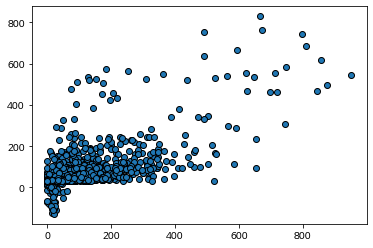

In [ ]:
predictions = lm.predict(X_test_s)
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions, edgecolor='black')

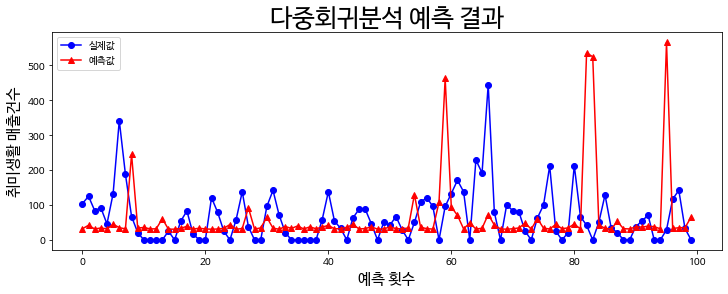

In [ ]:
fig=plt.figure(figsize=(12,4))
graph=fig.add_subplot(1,1,1)
graph.plot(y[0:100], marker='o', color='blue', label='실제값')
graph.plot(predictions[0:100], marker='^', color='red', label='예측값')
graph.set_title('다중회귀분석 예측 결과', size=25)
plt.xlabel('예측 횟수', size=15)
plt.ylabel('취미생활 매출건수', size=15)
plt.legend(loc='best')

### (4). 구매력(총수신금액)~ 구매물품 정보 : 구매품을 분석해서 개인의 구매력 예측
결과: 
'e머니/상품권_매출건수',
 'o2o서비스_매출건수',
 '건강식품_매출금액',
 '디지털_매출건수',
 '레저_매출금액',
 '신선/요리재료_매출건수',
 '신선/요리재료_매출금액',
 '여성의류_매출건수',
 '취미/특기_매출건수',
 '취미/특기_매출금액'등 사치품 수요에 따라 갈리는 것으로 보임

In [ ]:
df= pd.read_csv("refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수','법정동','성별','연령'])
df

,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,모바일상품_매출금액,문화_매출건수,문화_매출금액,...,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,기준년월
0,0.000000,0.000000,0.017010,114.828263,0.068858,2368.782303,0.004089,52.129539,0.000000,0.000000,0.000000,0.000000,0.006869,140.997219,0.0,0.0,0.0,0.0,0.002781,43.640170,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.004089,220.393850,0.000000,0.000000,0.010958,948.474158,0.0,0.0,0.0,0.0,0.002126,44.049231,0.002126,19.454694,...,0.0,0.000000,0.000000,0.012267,427.973667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017010,778.046287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,17546.130435,0.0,0.000000,8.008194e+05,1.848215e+06,2.789248e+06,0.0,0.000,0.0,0.0,0.0,0.0,1
1,0.000000,0.000000,0.024207,566.784429,0.120216,4014.188911,0.002290,41.541871,0.001145,52.659470,0.001472,64.532221,0.002781,116.097645,0.0,0.0,0.0,0.0,0.002617,27.377985,0.000000,0.000000,0.0,0.0,0.000818,56.187766,0.003598,232.059208,0.000000,0.000000,0.011286,1293.103369,0.0,0.0,0.0,0.0,0.000818,13.273307,0.002781,46.412496,...,0.0,0.001636,107.793261,0.021753,1151.827936,0.001145,36.026824,0.001636,33.143932,0.0,0.0,0.000818,27.769709,0.000000,0.000000,0.029604,1281.505070,0.001145,75.415767,0.0,0.0,0.0,0.0,0.001963,95.888616,0.0,0,0.000000,0.0,0.000000,8.501875e+05,1.928101e+06,3.027432e+06,0.0,0.000,0.0,0.0,0.0,0.0,2
2,0.000654,19.136408,0.027151,952.164540,0.135100,3898.909225,0.003598,69.801276,0.000654,31.548250,0.001308,253.223749,0.003108,106.937193,0.0,0.0,0.0,0.0,0.002617,41.030422,0.002126,2.453386,0.0,0.0,0.000000,0.000000,0.004253,265.227674,0.000000,0.000000,0.011613,1509.706739,0.0,0.0,0.0,0.0,0.004089,55.230618,0.000981,48.373242,...,0.0,0.001472,82.424763,0.010631,382.457638,0.001145,29.183677,0.002944,48.214426,0.0,0.0,0.001472,59.417730,0.000818,47.794243,0.026333,1088.326955,0.002126,83.213935,0.0,0.0,0.0,0.0,0.002453,67.205921,0.0,0,21494.421488,0.0,0.000000,6.893922e+05,2.168106e+06,2.778842e+06,0.0,0.000,0.0,0.0,0.0,0.0,3
3,0.000000,0.000000,0.030749,348.570985,0.101570,3128.744194,0.001636,30.537291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008996,32.762349,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010141,407.840693,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.001636,69.506542,0.014557,560.352797,0.001636,115.541871,0.000000,0.000000,0.0,0.0,0.001636,21.738469,0.000000,0.000000,0.032875,740.884527,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001636,91.046778,0.0,0,15855.512000,0.0,0.000000,8.597557e+05,2.388974e+06,3.210482e+06,0.0,26700.408,0.0,0.0,0.0,0.0,4
4,0.000000,0.000000,0.045306,873.300785,0.150147,3604.572784,0.002781,76.523716,0.001636,1186.610075,0.001472,58.602879,0.001472,31.763657,0.0,0.0,0.0,0.0,0.006869,45.068041,0.002617,4.786719,0.0,0.0,0.000000,0.000000,0.001963,78.998037,0.000164,0.000164,0.008832,888.749100,0.0,0.0,0.0,0.0,0.042525,427.436539,0.004253,56.444553,...,0.0,0.000818,36.832188,0.013085,450.886163,0.001636,50.379457,0.002290,49.319594,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.043343,1074.862938,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001145,22.582434,0.0,0,37360.203252,0.0,0.000000,8.400755e+05,2.596431e+06,2.876002e+06,0.0,0.000,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
X=df.iloc[:,:100]
y=df.loc[:,['총수신금액']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

X_train_s=pd.DataFrame(X_train_s)
X_test_s=pd.DataFrame(X_test_s)

**PCA를 통해 어떤 구매 품목을 가진 사람들이 총수신금액이 많을지 예측**

In [ ]:
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

rg=XGBRegressor()
rg.fit(X_train_s,y_train)

selector =RFE(rg, n_features_to_select=10)
selector = selector.fit(X_test_s, y_test)

[14:22:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14:22:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
##피처들 중 중요값이 True
selector.support_ 

array([False, False,  True, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
##피처들의 순위
selector.ranking_

array([65, 63,  1, 45,  1,  4, 58, 22, 40, 46, 28, 21, 32,  1, 88, 66, 17,
       76, 20, 31, 78, 80, 67, 82, 68, 53, 44, 86, 48, 69,  1, 33, 16,  1,
        8, 51, 19, 56, 50, 27, 70, 83, 57, 47, 18, 89, 35, 39, 64, 91,  9,
       61, 87, 85, 49, 52, 55,  3, 36, 41, 34, 12, 81, 79, 24, 84,  1,  1,
       77, 71, 14,  6, 59, 60,  1,  2, 11, 10, 15, 13, 26, 37, 72,  7, 30,
       23, 43, 29,  1,  1, 54, 42, 73, 74, 38, 75, 25,  5, 62, 90])

In [ ]:
###PCA이후에 중요 피처 열이름 추출
i=0
for i in range(0,100):
  if selector.support_[i]==True:
    coln=X.iloc[[0],[i]].any(axis=0).index.values
    i+=1
    print(coln)
  else:
    i+=1

[' e머니/상품권_매출건수']
['o2o서비스_매출건수']
['건강식품_매출금액']
['디지털_매출건수']
['레저_매출금액']
['신선/요리재료_매출건수']
['신선/요리재료_매출금액']
['여성의류_매출건수']
['취미/특기_매출건수']
['취미/특기_매출금액']


In [ ]:
i=0
coln=[]
for i in range(0,100):
  if selector.support_[i]==True:
    a=X.iloc[[0],[i]].any(axis=0).index.values
    i+=1
    coln.append(a[0])
  else:
    i+=1

In [ ]:
coln

[' e머니/상품권_매출건수',
 'o2o서비스_매출건수',
 '건강식품_매출금액',
 '디지털_매출건수',
 '레저_매출금액',
 '신선/요리재료_매출건수',
 '신선/요리재료_매출금액',
 '여성의류_매출건수',
 '취미/특기_매출건수',
 '취미/특기_매출금액']

**추출한 요소들을 바탕으로 회귀 분석 진행**

In [ ]:
X=df[[' e머니/상품권_매출건수',
 'o2o서비스_매출건수',
 '건강식품_매출금액',
 '디지털_매출건수',
 '레저_매출금액',
 '신선/요리재료_매출건수',
 '신선/요리재료_매출금액',
 '여성의류_매출건수',
 '취미/특기_매출건수',
 '취미/특기_매출금액']]
y=df.loc[:,['총수신금액']]

In [ ]:
y

,총수신금액
0,1.848215e+06
1,1.928101e+06
2,2.168106e+06
3,2.388974e+06
4,2.596431e+06
...,...
9012,2.967546e+06
9013,4.984530e+06
9014,3.748324e+06
9015,1.147686e+07


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

X_train_s=pd.DataFrame(X_train_s)
X_test_s=pd.DataFrame(X_test_s)

여러 회귀 모델을 준비

1.RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

lm=RandomForestRegressor()
lm.fit(X_train_s, y_train)
predictions = lm.predict(X_test_s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 1092586.7200547056
MSE: 2109183250848.1377
RMSE: 1452302.740770029
R^2: 0.408


2.XGBoostRegressor

In [ ]:
from xgboost import XGBRegressor
lm = XGBRegressor()
lm.fit(X_train_s, y_train)
predictions = lm.predict(X_test_s)

[14:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 1098687.302807072
MSE: 2098010411840.005
RMSE: 1448451.0388135337
R^2: 0.411


3.LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_s, y_train)
predictions = lm.predict(X_test_s)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 1237199.5981769995
MSE: 2576671932554.5615
RMSE: 1605201.5239696733
R^2: 0.277


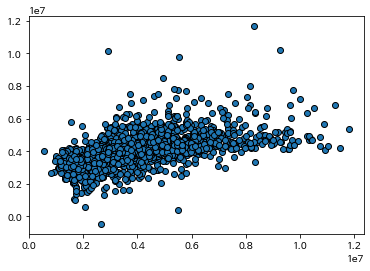

In [ ]:
predictions = lm.predict(X_test_s)
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions, edgecolor='black')

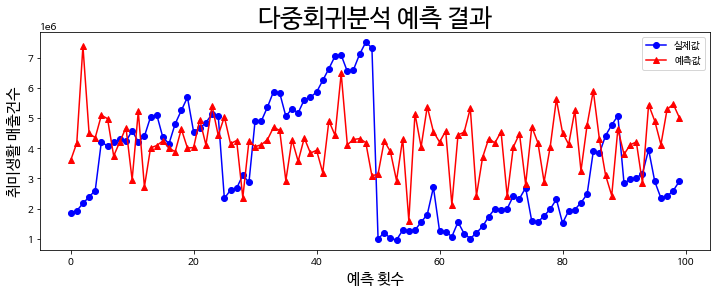

In [ ]:
fig=plt.figure(figsize=(12,4))
graph=fig.add_subplot(1,1,1)
graph.plot(y[0:100], marker='o', color='blue', label='실제값')
graph.plot(predictions[0:100], marker='^', color='red', label='예측값')
graph.set_title('다중회귀분석 예측 결과', size=25)
plt.xlabel('예측 횟수', size=15)
plt.ylabel('취미생활 매출건수', size=15)
plt.legend(loc='best')